Numebr of images in Sample051 :  148


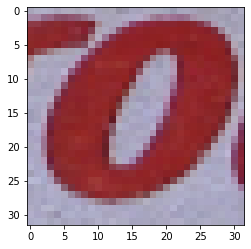

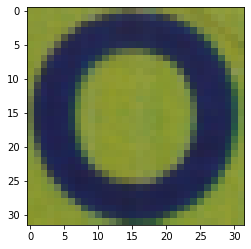

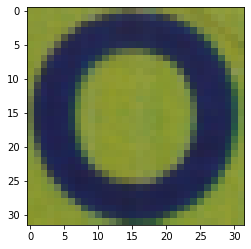

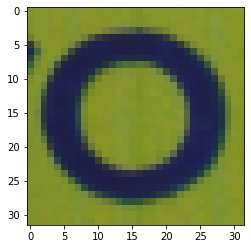

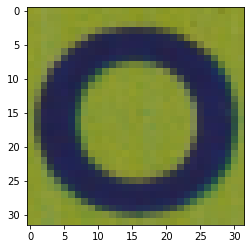

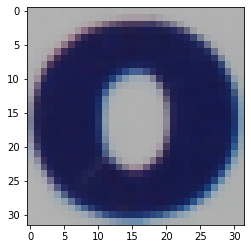

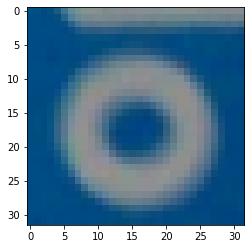

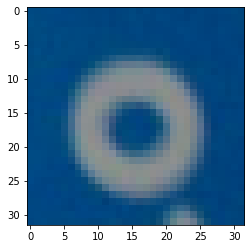

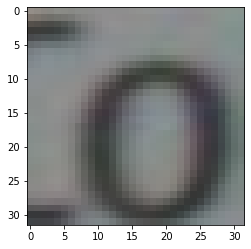

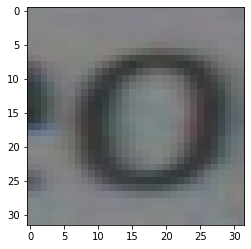

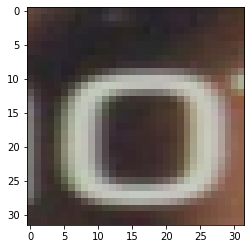

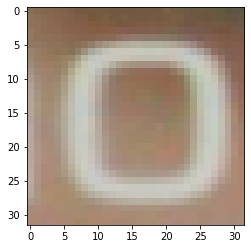

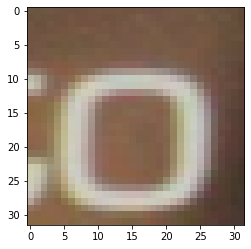

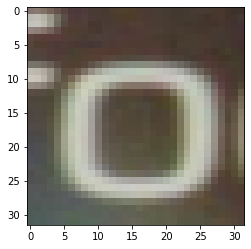

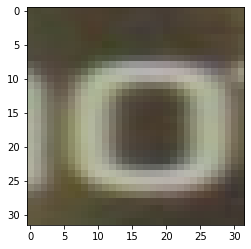

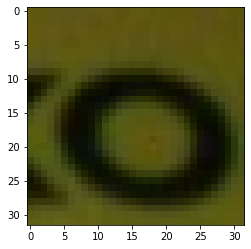

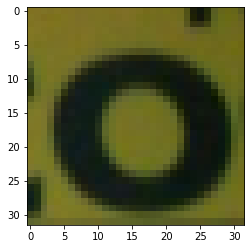

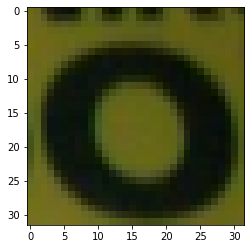

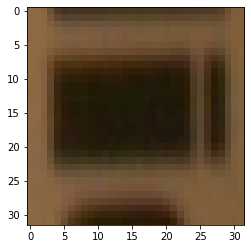

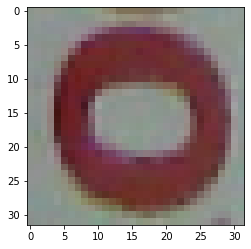

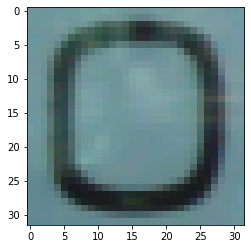

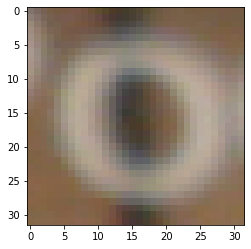

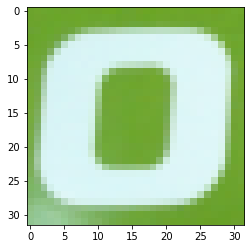

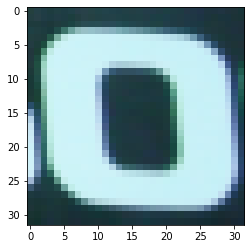

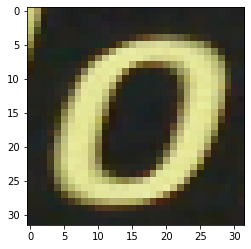

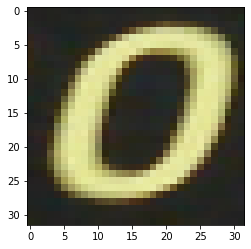

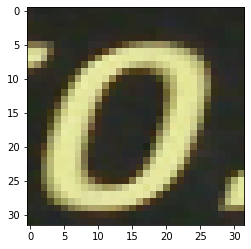

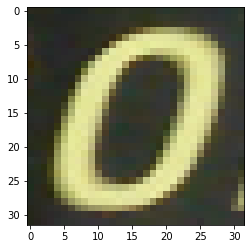

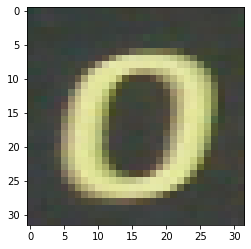

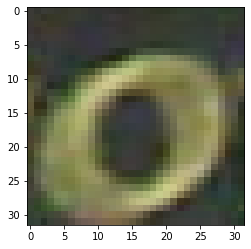

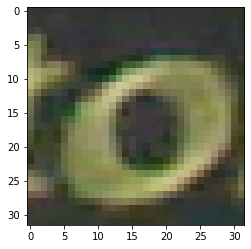

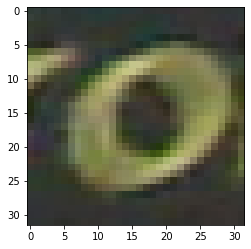

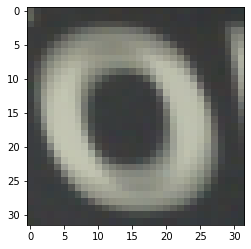

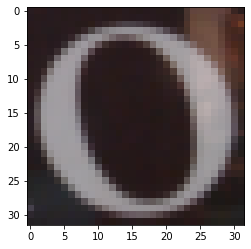

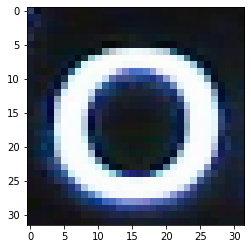

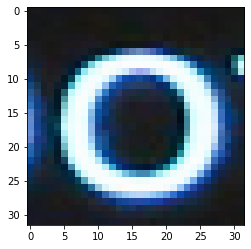

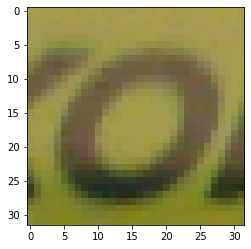

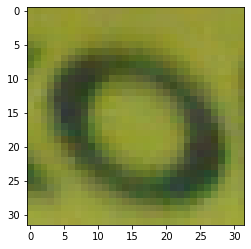

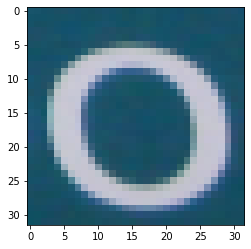

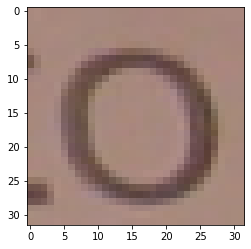

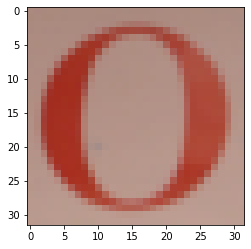

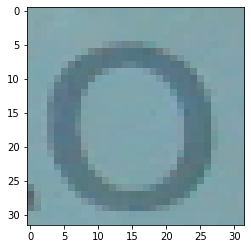

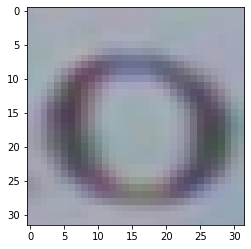

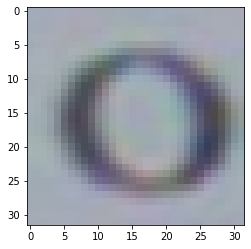

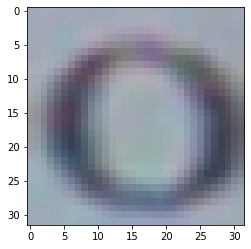

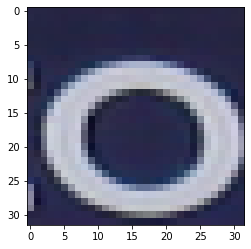

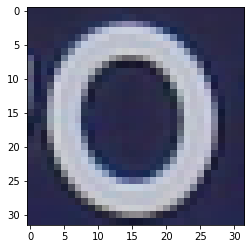

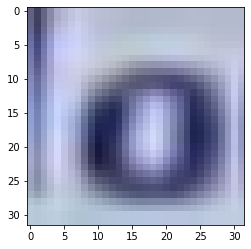

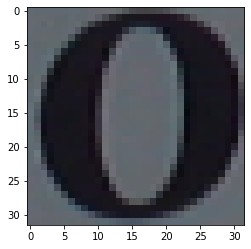

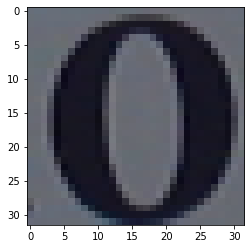

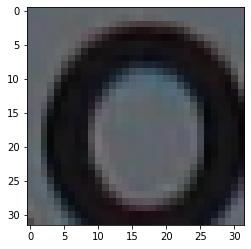

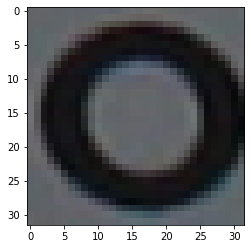

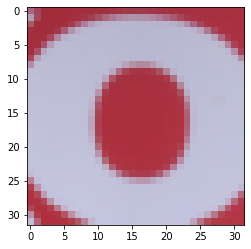

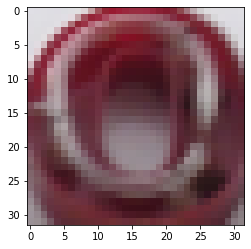

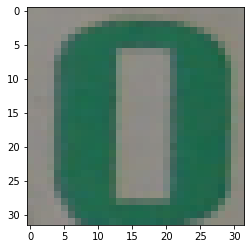

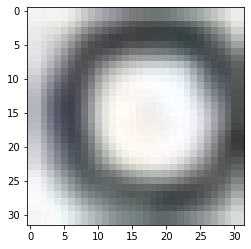

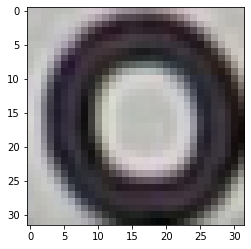

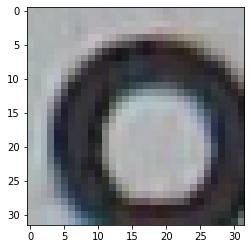

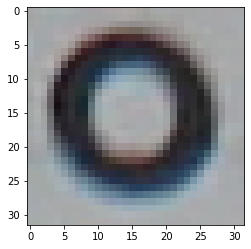

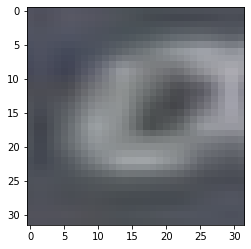

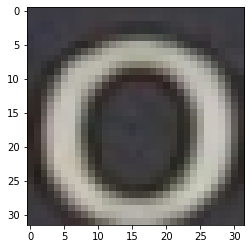

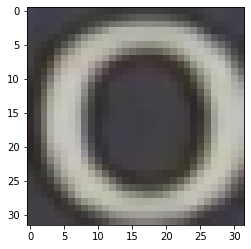

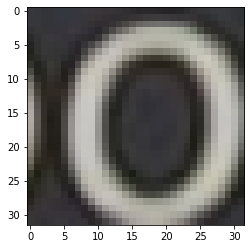

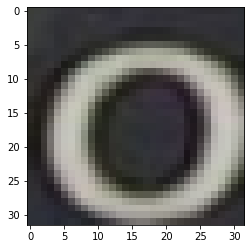

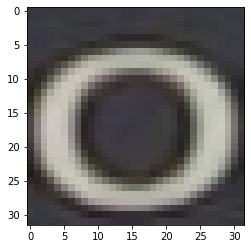

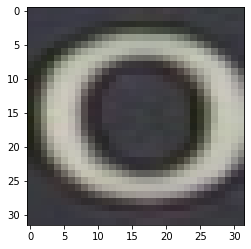

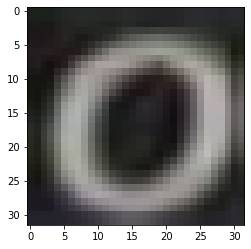

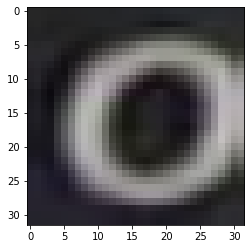

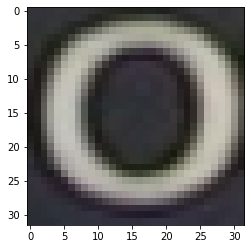

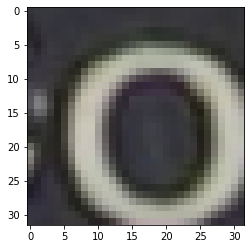

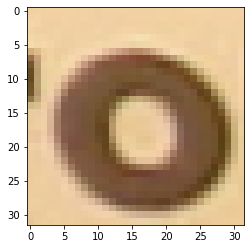

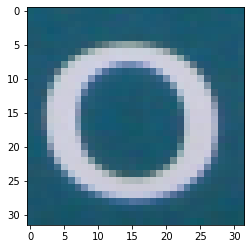

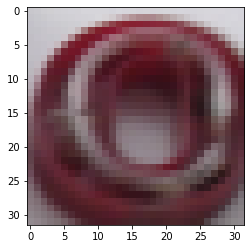

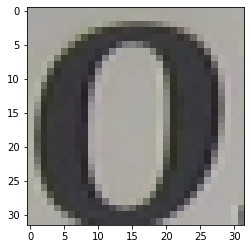

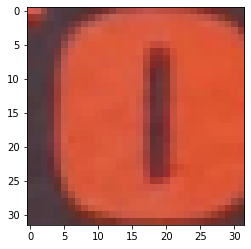

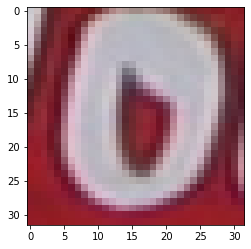

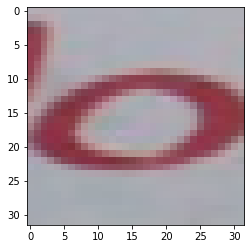

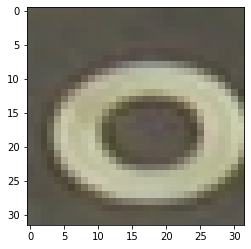

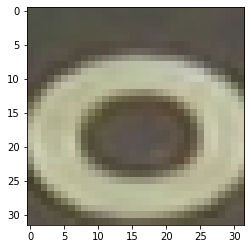

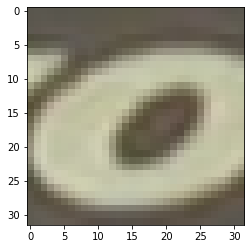

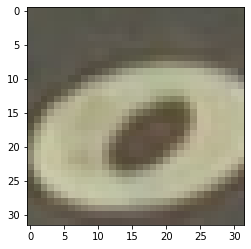

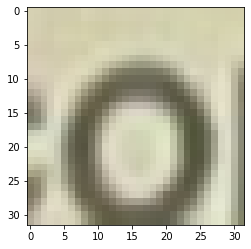

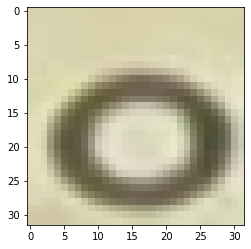

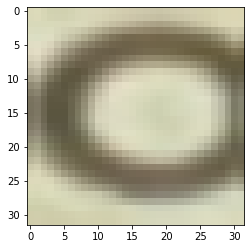

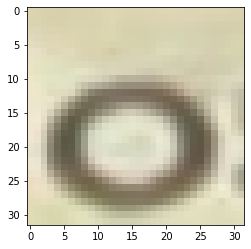

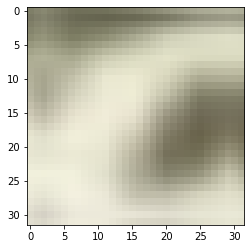

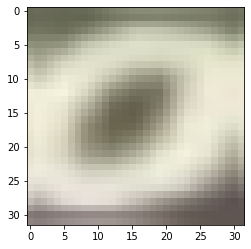

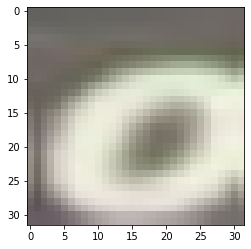

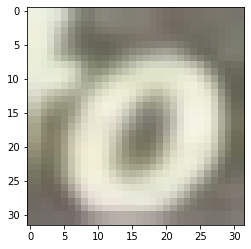

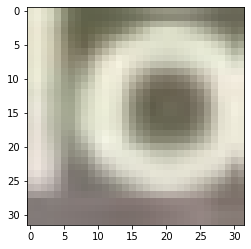

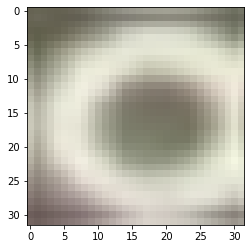

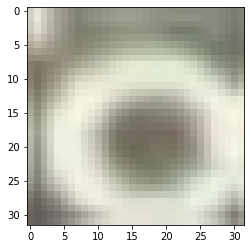

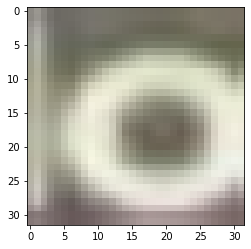

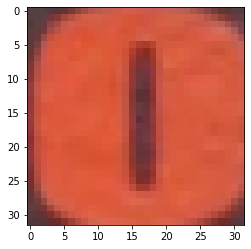

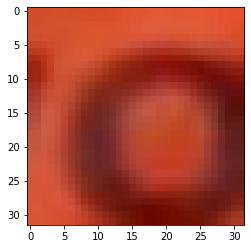

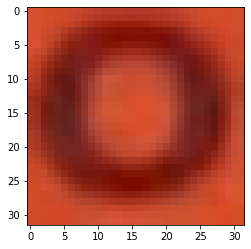

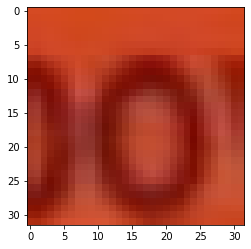

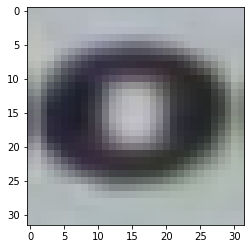

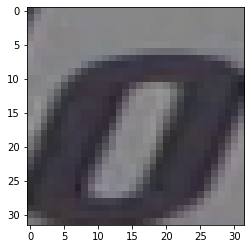

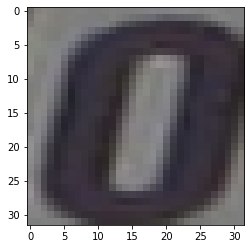

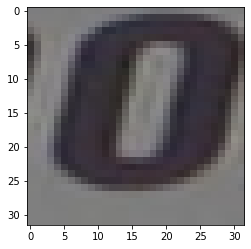

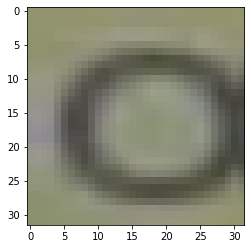

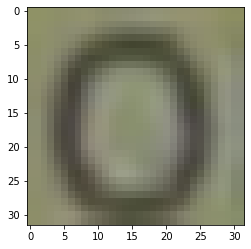

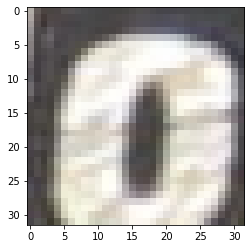

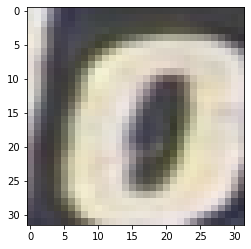

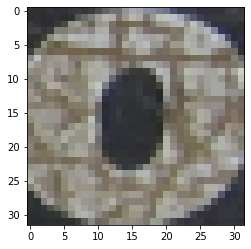

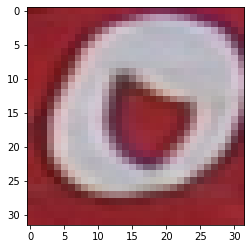

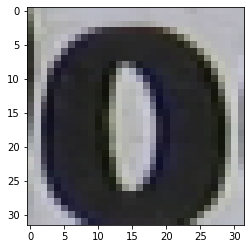

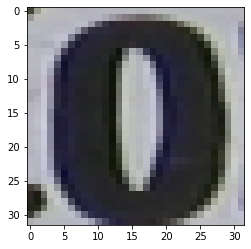

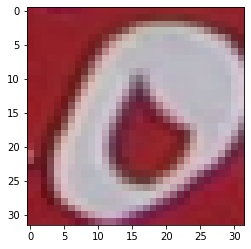

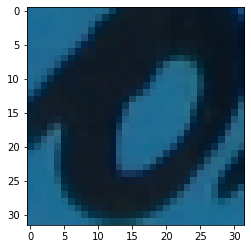

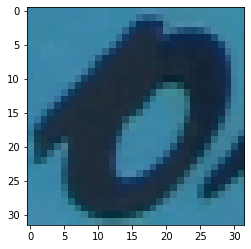

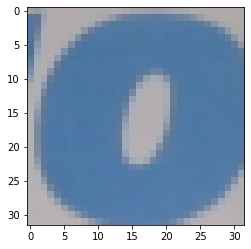

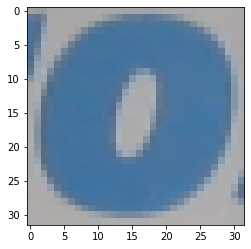

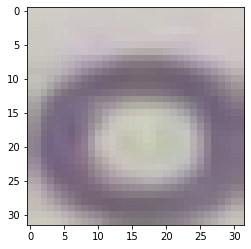

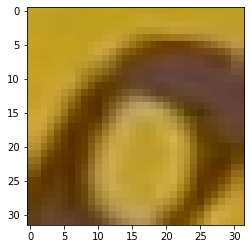

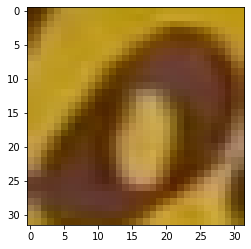

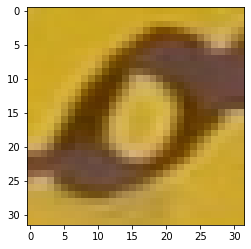

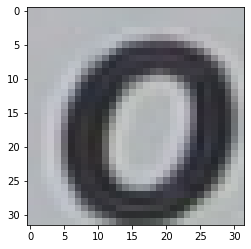

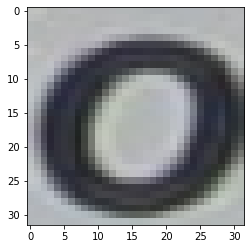

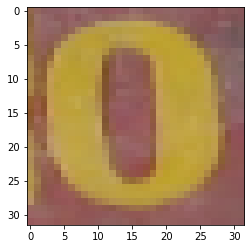

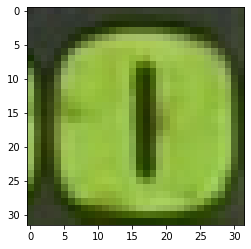

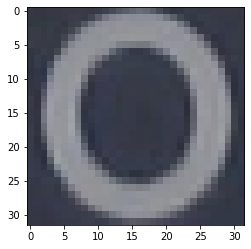

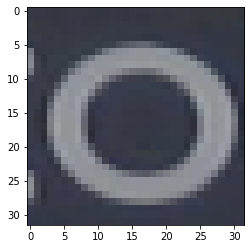

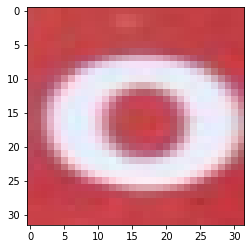

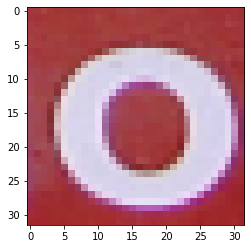

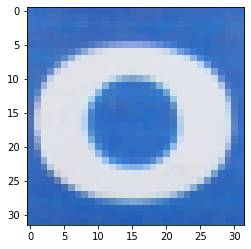

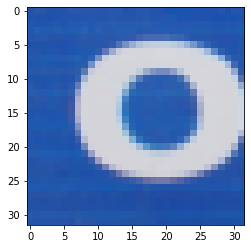

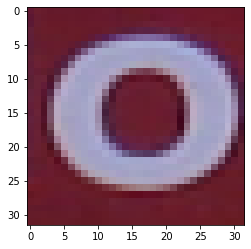

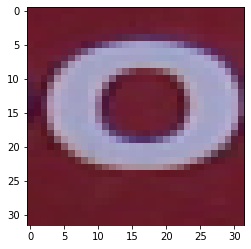

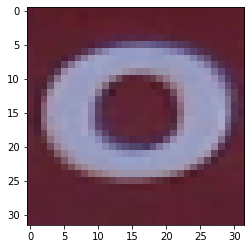

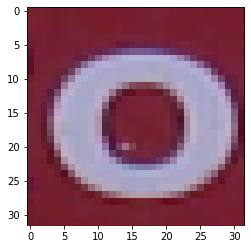

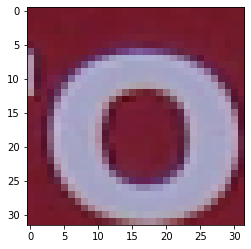

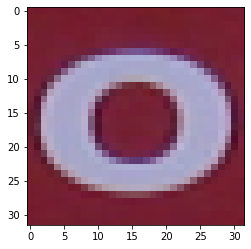

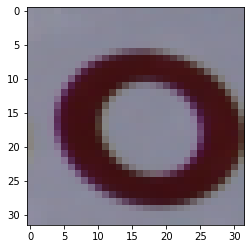

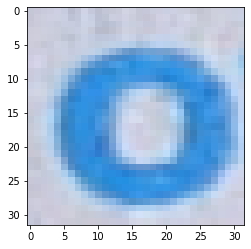

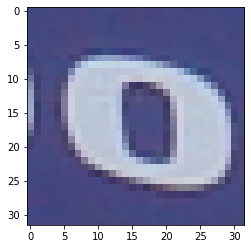

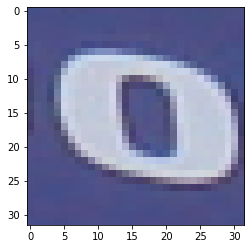

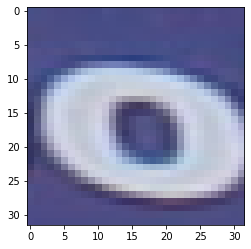

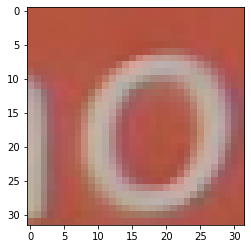

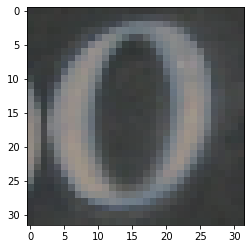

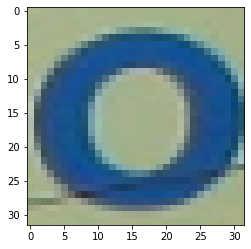

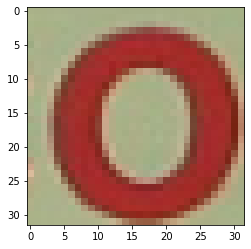

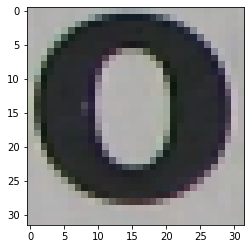

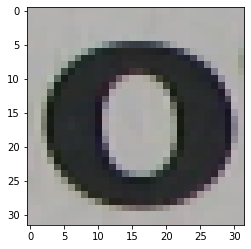

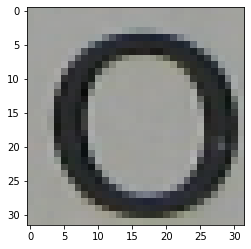

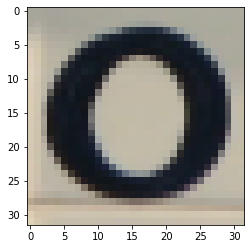

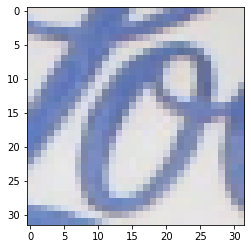

Numebr of images in Sample053 :  54


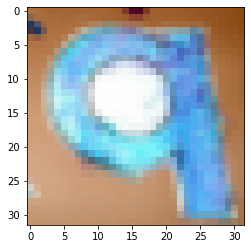

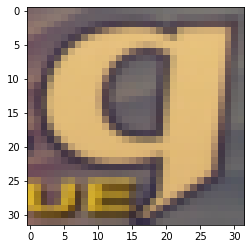

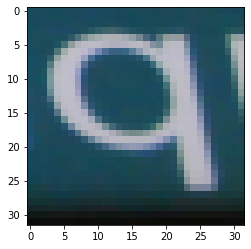

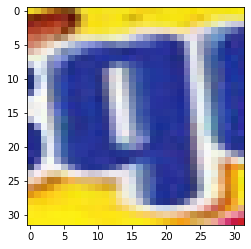

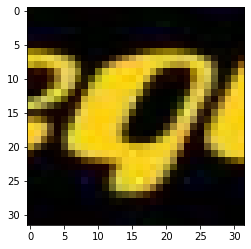

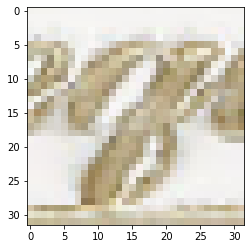

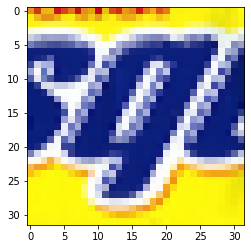

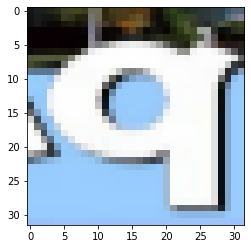

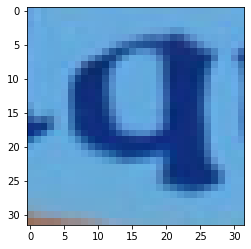

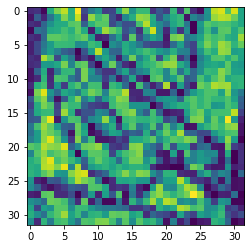

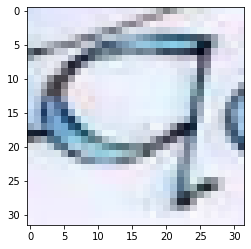

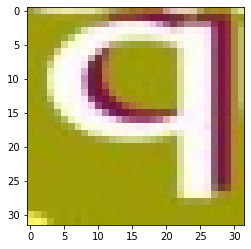

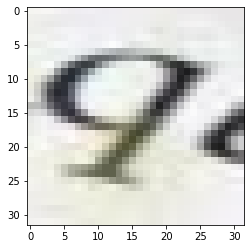

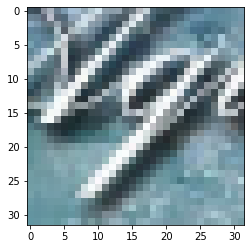

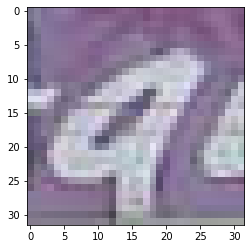

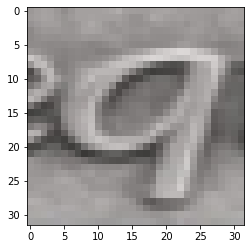

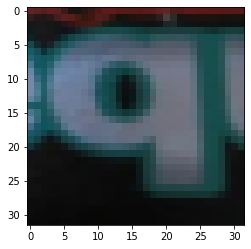

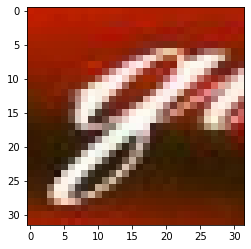

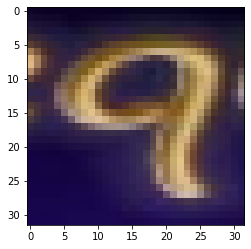

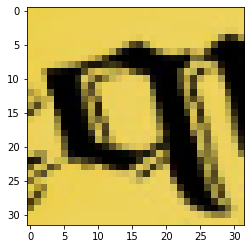

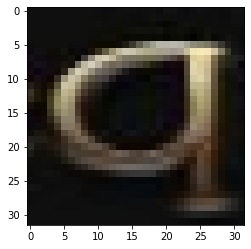

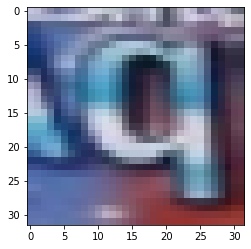

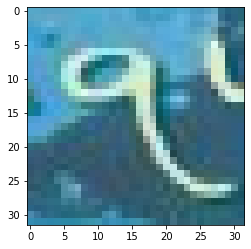

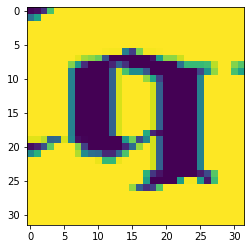

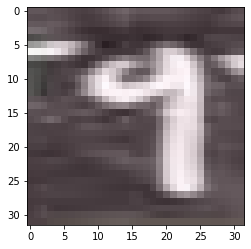

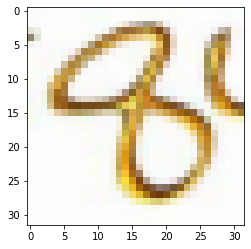

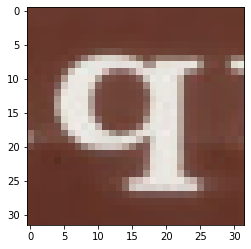

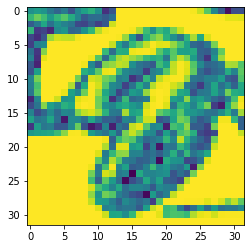

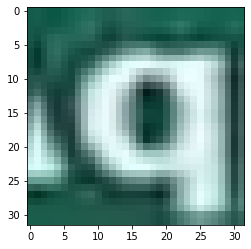

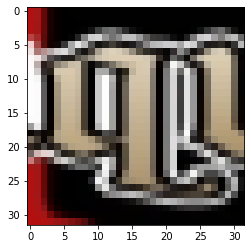

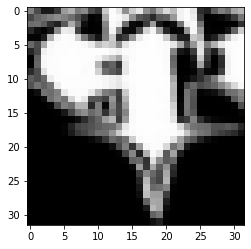

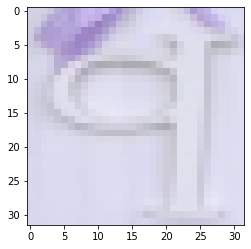

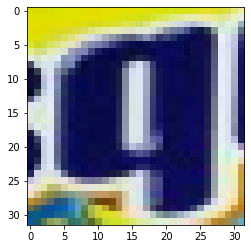

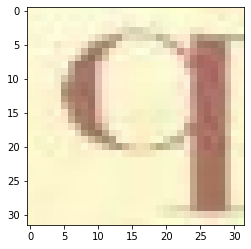

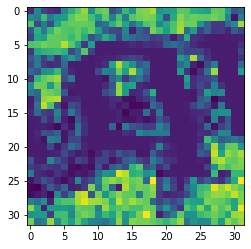

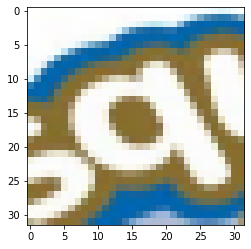

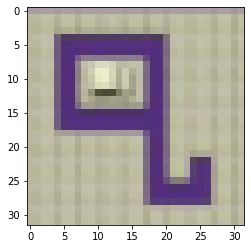

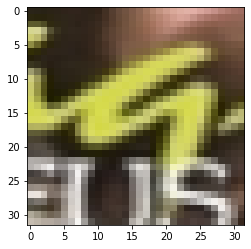

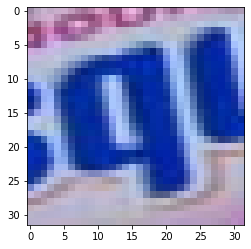

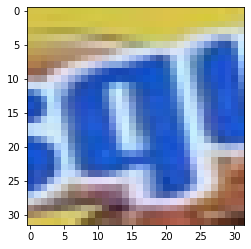

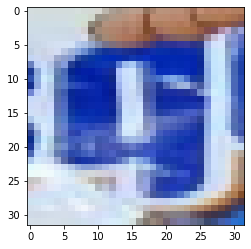

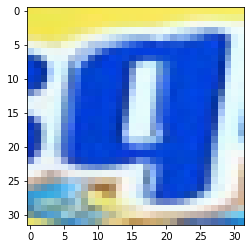

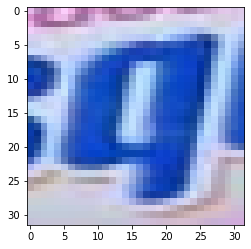

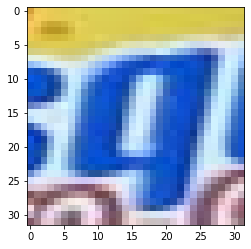

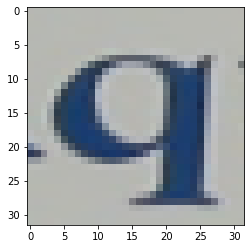

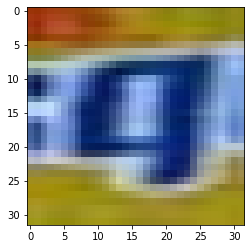

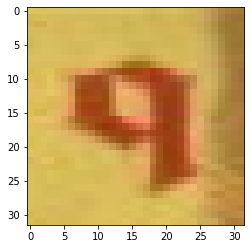

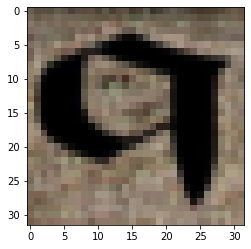

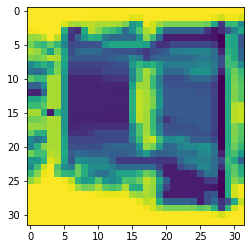

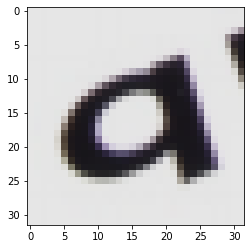

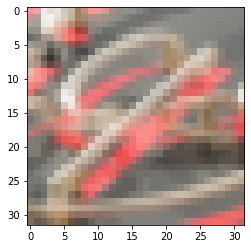

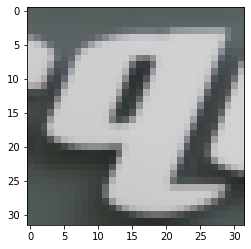

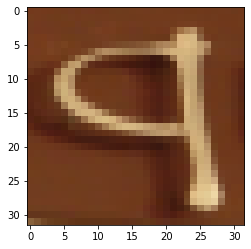

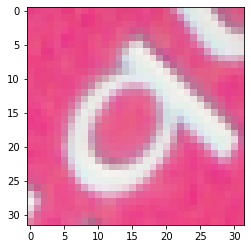

Numebr of images in Sample017 :  143


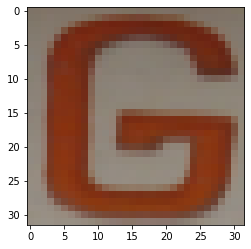

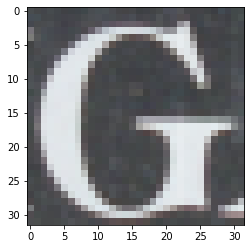

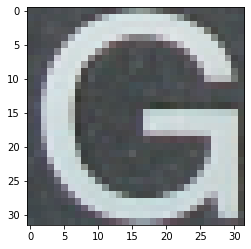

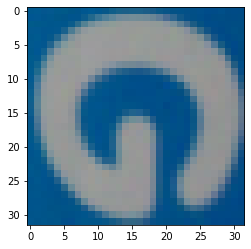

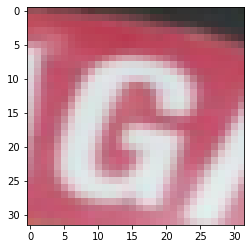

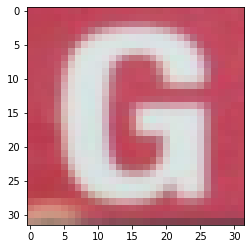

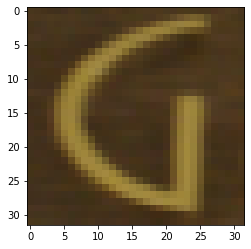

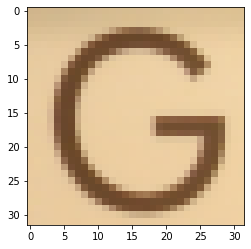

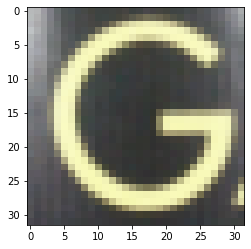

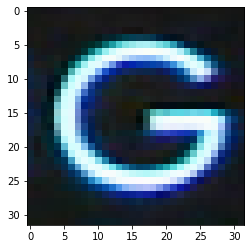

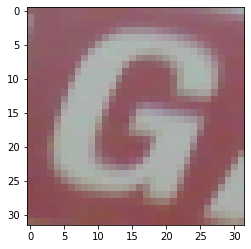

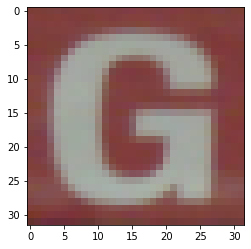

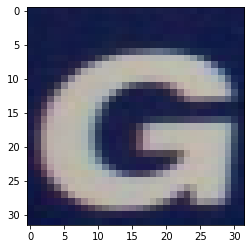

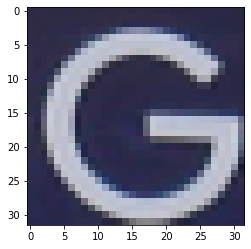

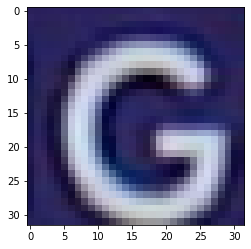

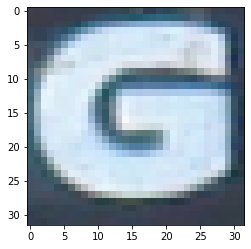

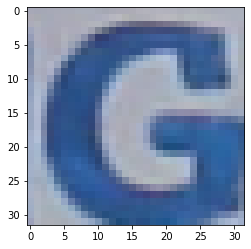

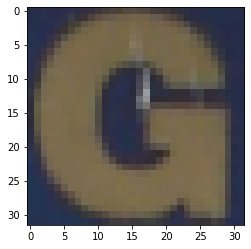

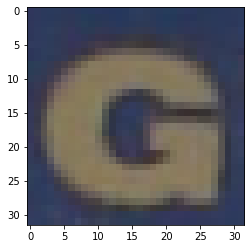

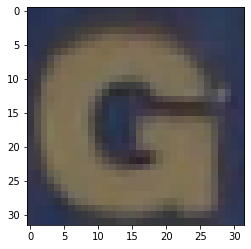

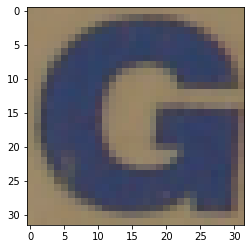

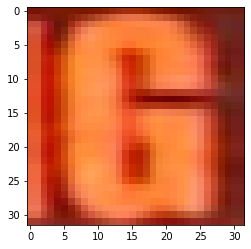

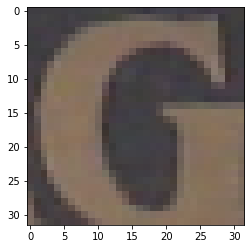

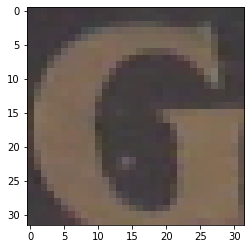

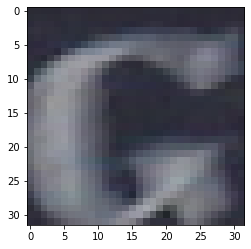

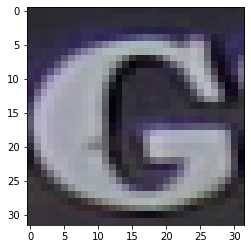

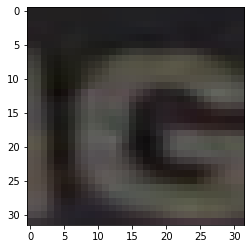

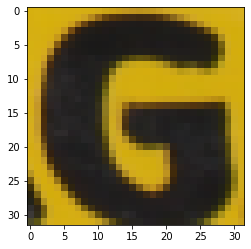

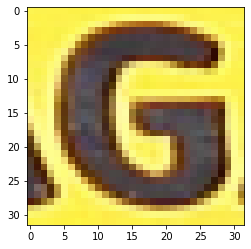

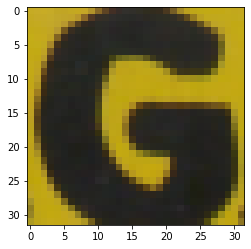

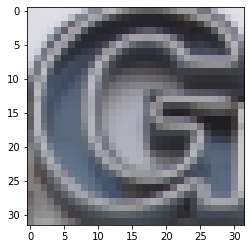

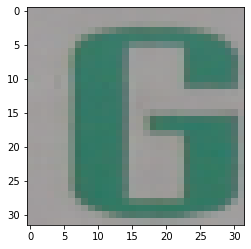

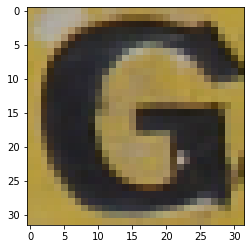

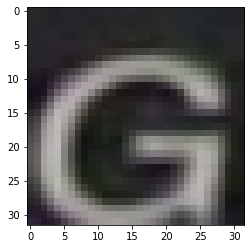

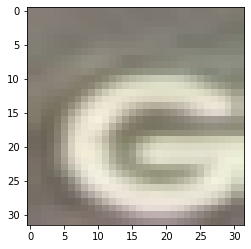

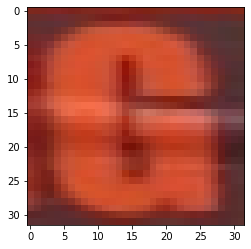

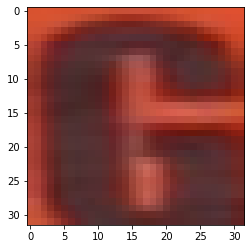

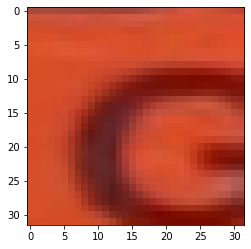

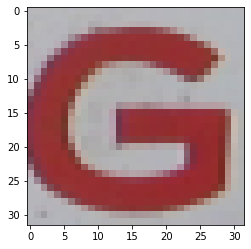

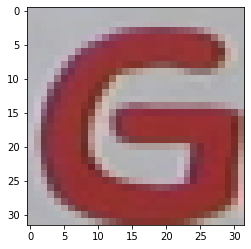

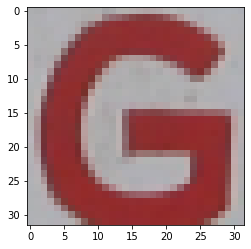

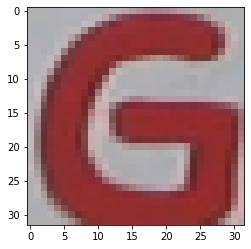

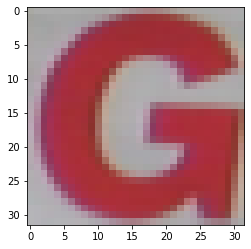

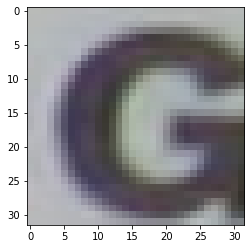

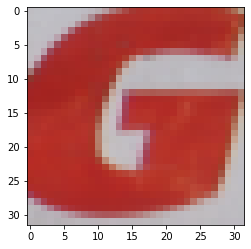

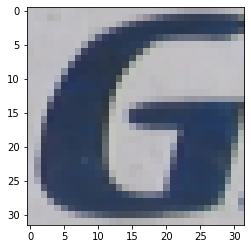

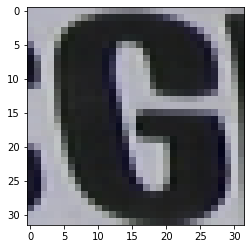

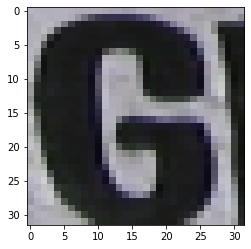

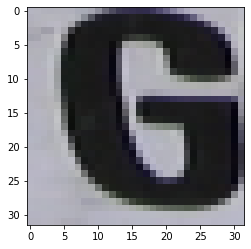

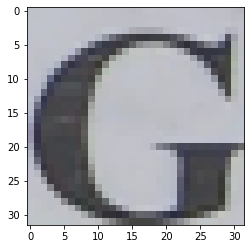

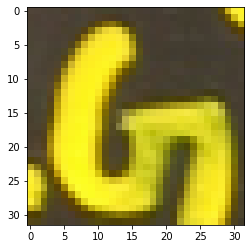

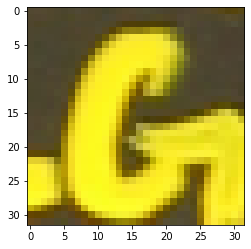

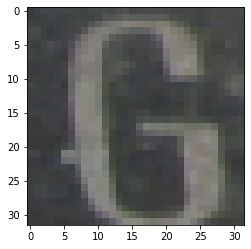

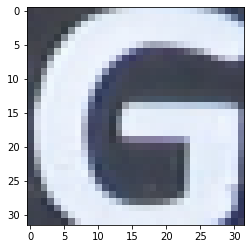

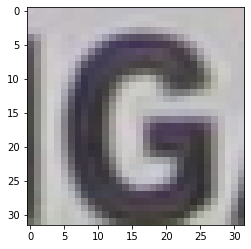

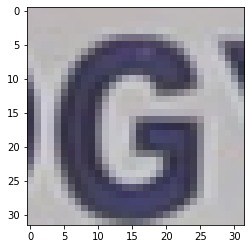

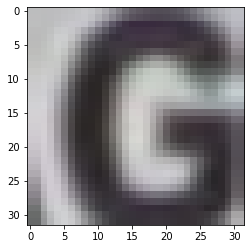

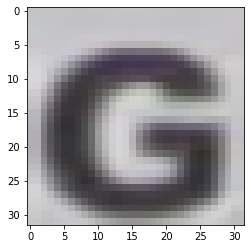

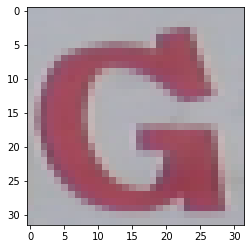

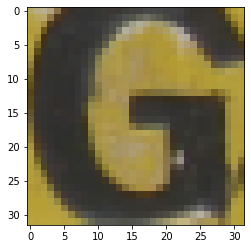

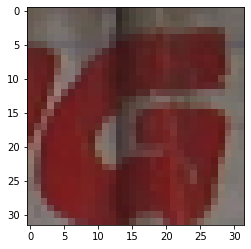

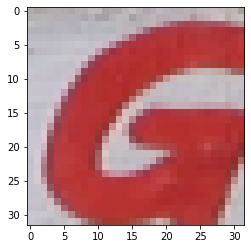

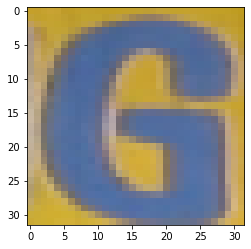

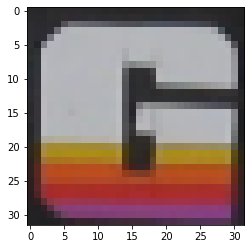

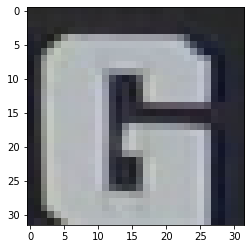

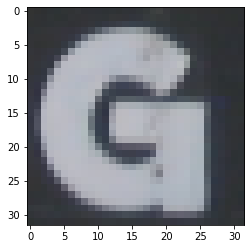

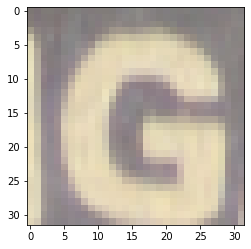

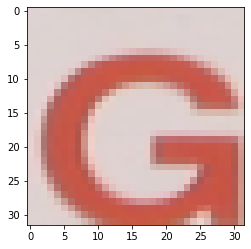

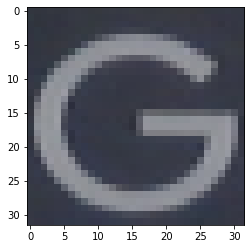

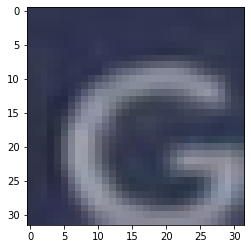

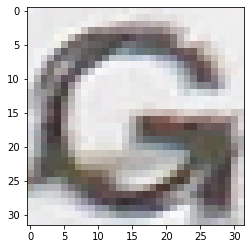

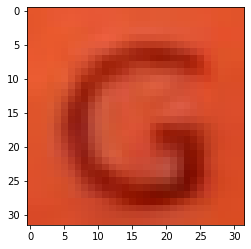

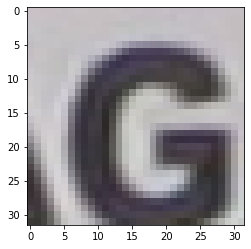

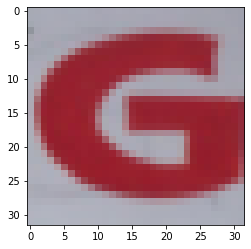

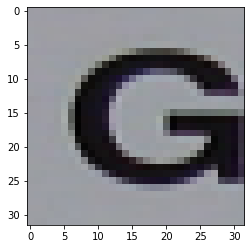

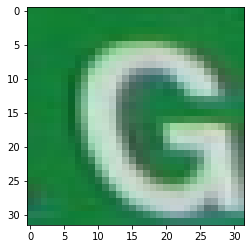

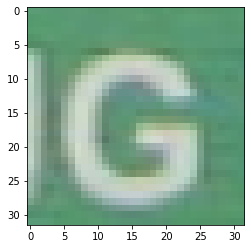

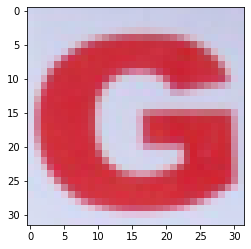

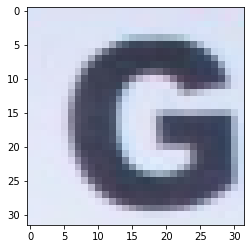

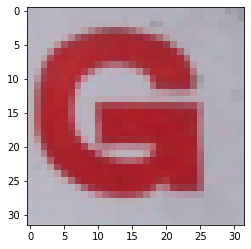

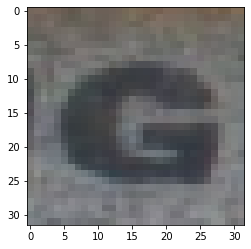

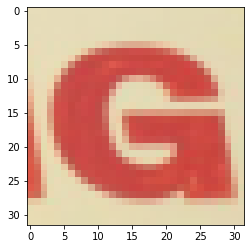

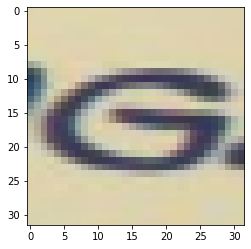

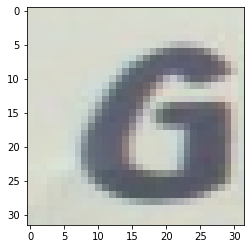

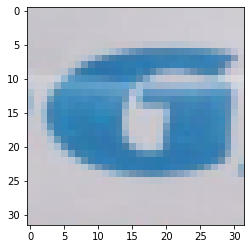

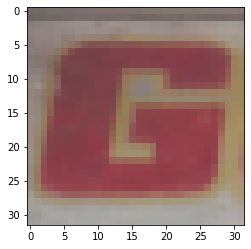

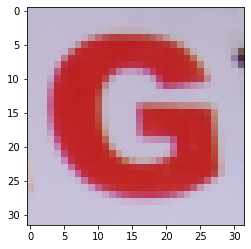

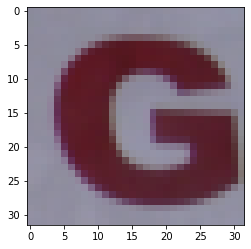

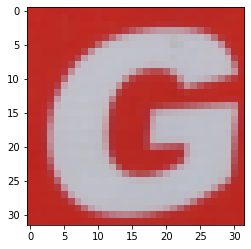

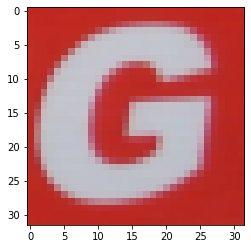

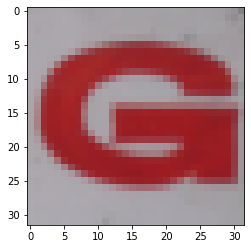

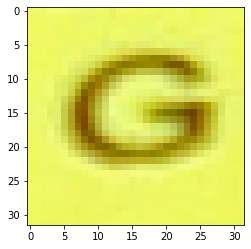

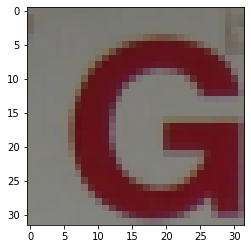

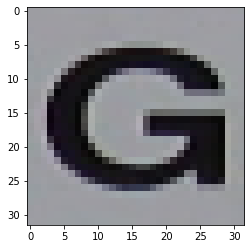

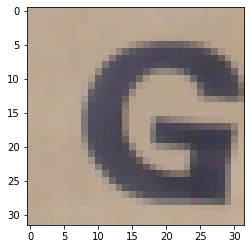

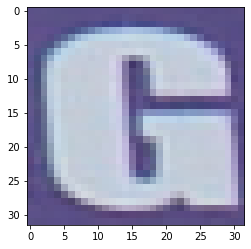

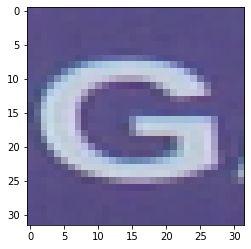

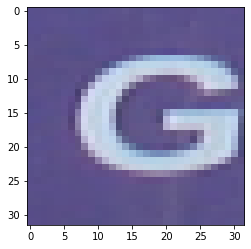

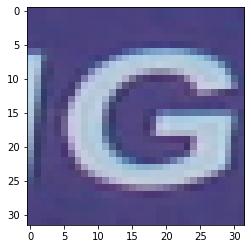

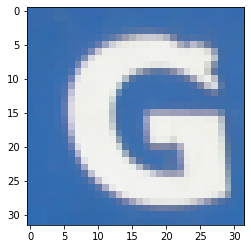

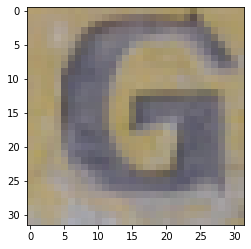

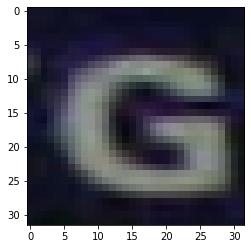

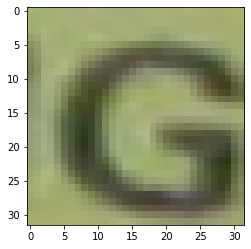

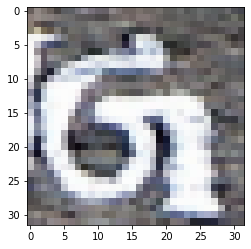

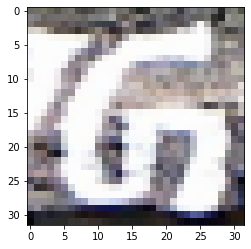

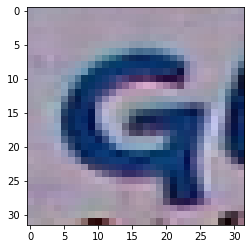

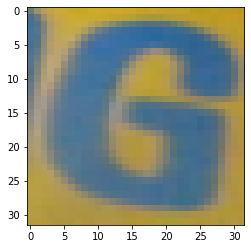

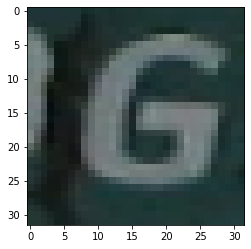

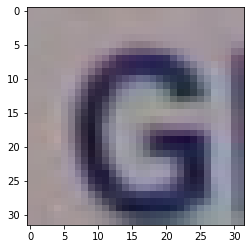

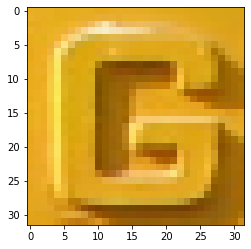

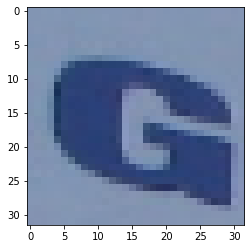

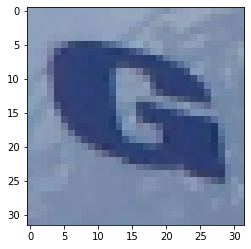

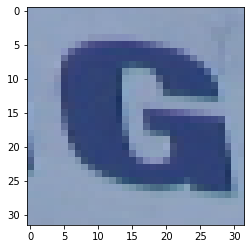

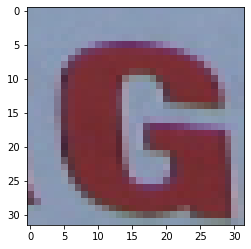

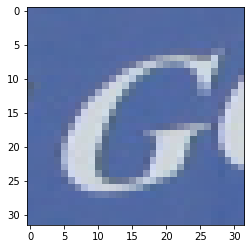

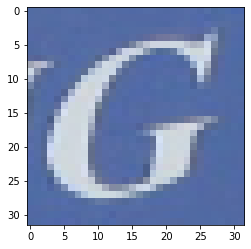

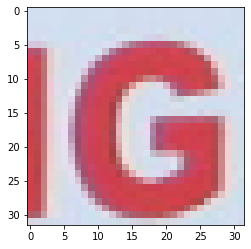

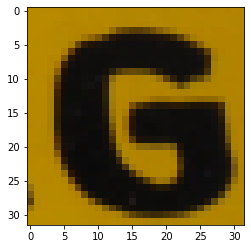

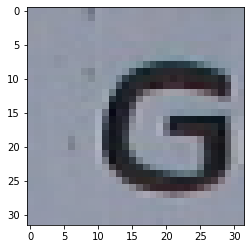

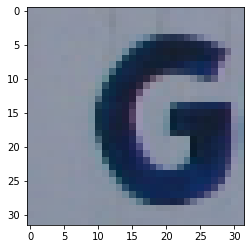

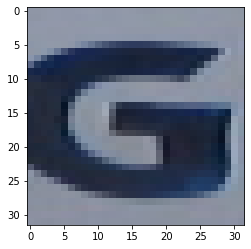

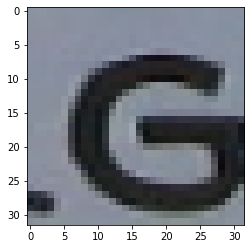

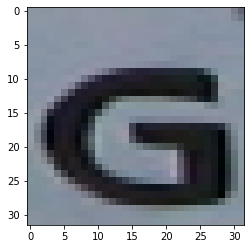

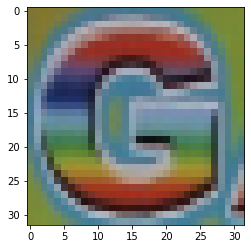

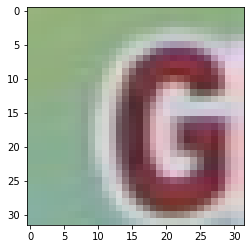

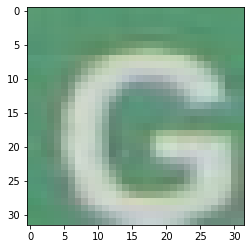

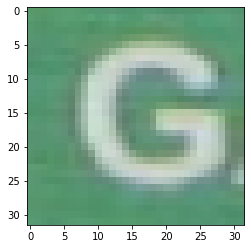

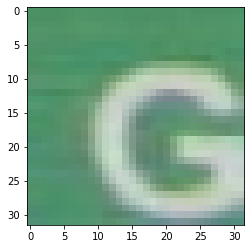

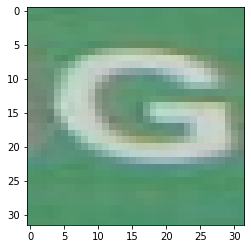

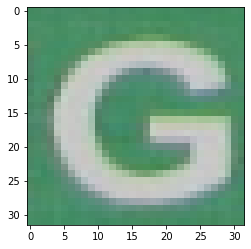

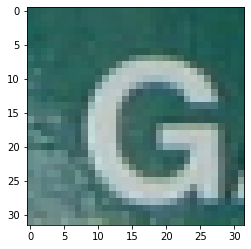

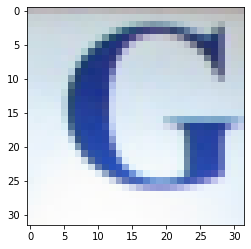

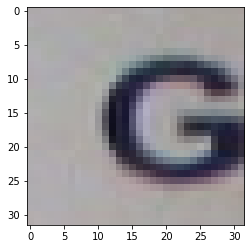

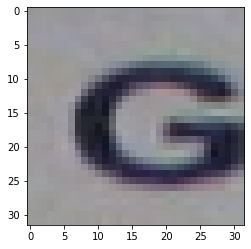

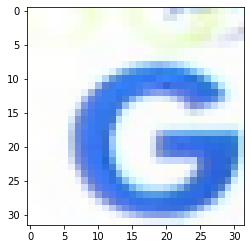

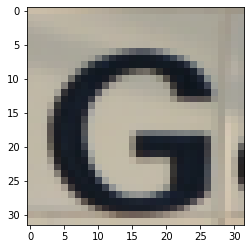

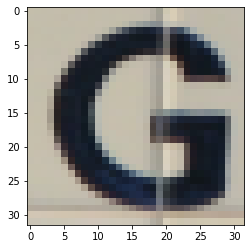

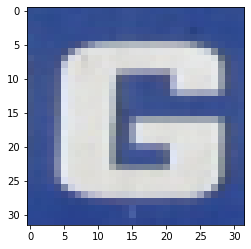

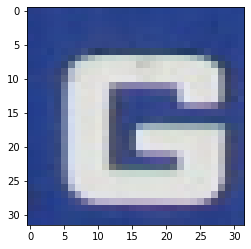

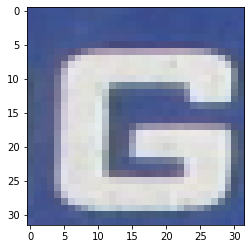

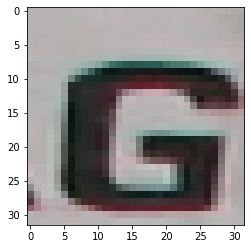

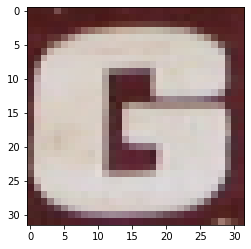

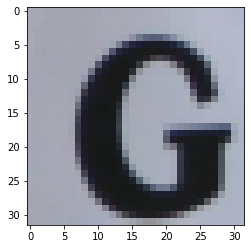

Numebr of images in Sample009 :  32


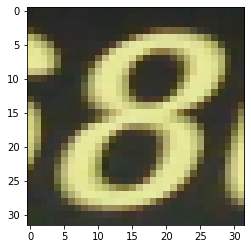

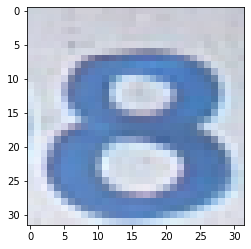

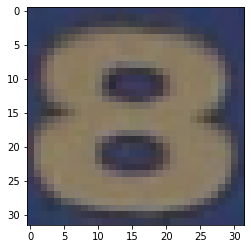

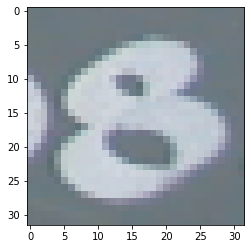

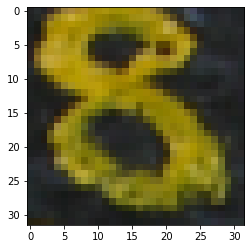

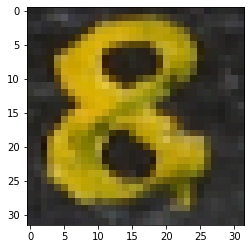

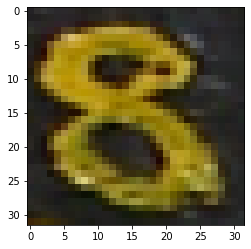

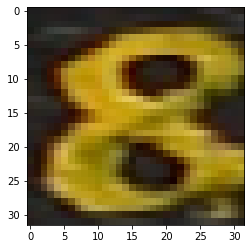

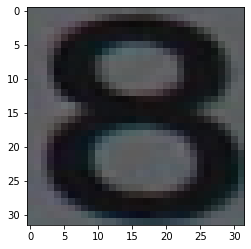

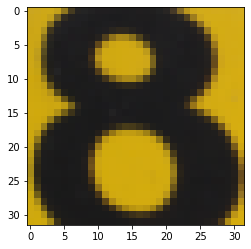

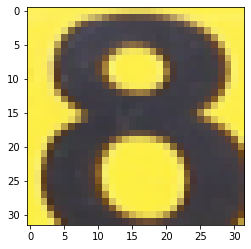

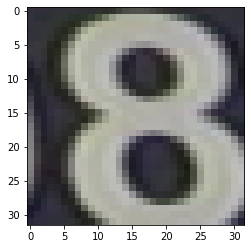

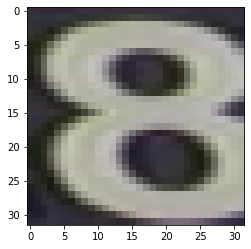

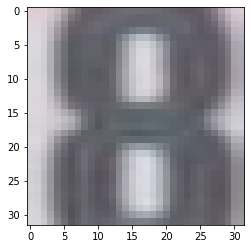

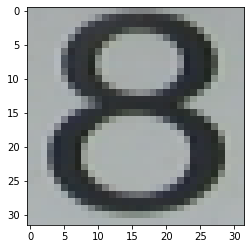

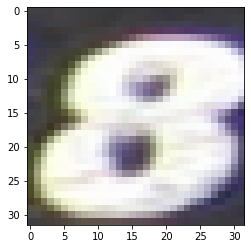

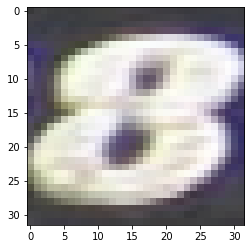

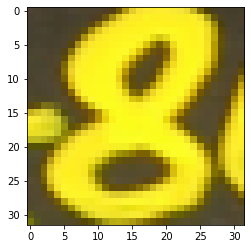

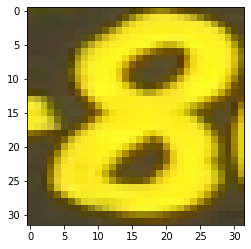

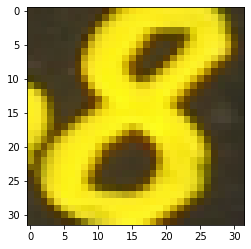

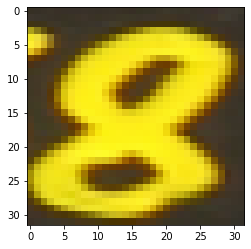

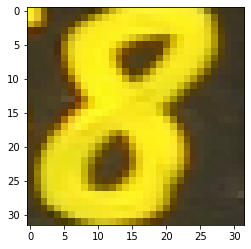

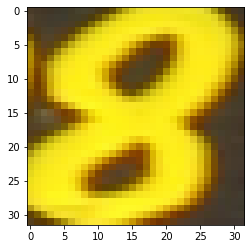

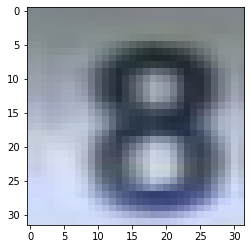

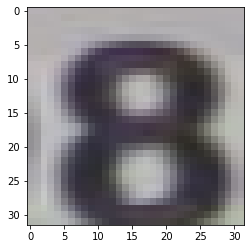

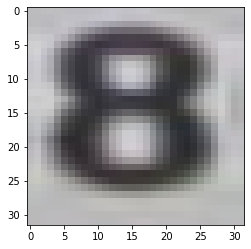

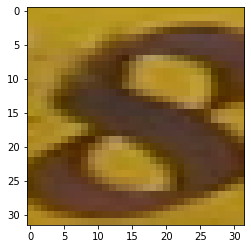

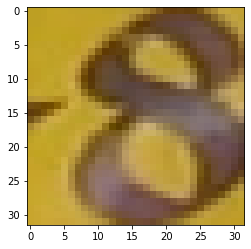

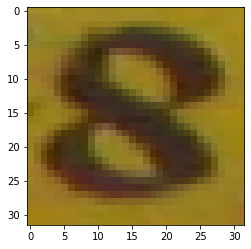

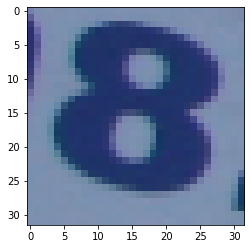

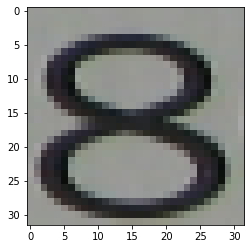

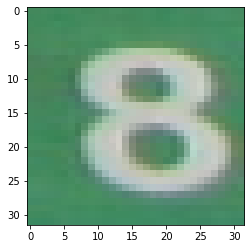

In [172]:
from skimage.io import imread
from skimage.transform import resize

import numpy as np
from numpy import asarray
from matplotlib import pyplot
import os


#  Load the images into numpy matrices.

path = 'EnglishImg/English/Img/GoodImg/Bmp/'
o_path = 'Sample051'
q_path = 'Sample053'
G_path = 'Sample017'
n8_path = 'Sample009'

paths = [o_path, q_path, G_path, n8_path]

o_array = []
q_array = []
G_array = []
n8_array = []

images_list = [o_array, q_array, G_array, n8_array]
images_array = np.array([np.array([]),np.array([]),np.array([]),np.array([])])
for i in range (0,4):
    
    dirs = os.listdir( path+paths[i] )
    print('Numebr of images in',paths[i],': ' ,len(dirs))
    
    for item in dirs:
        image = imread(path+paths[i]+'/'+item)
        resized = resize(image, (32, 32)) #[:,:,::-1]
                    
        pyplot.imshow(resized)
        pyplot.show()
        images_list[i].append(asarray(resized))
        
 

(32, 32, 3)
(32, 3)
(3,)


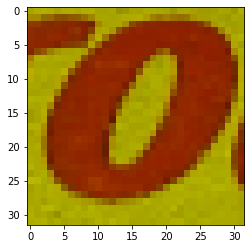

In [173]:
play = np.copy(images_list[0][0]) # One image to play with
print(play.shape) # Shape of the image
print(play[3].shape) # Shape of the 3rd row of pixels ?
print(play[3][31].shape) #Shape of the 3rd row's 31st pixel ?

# # I want to try playing with color channels
# # All rows, all columns (All pixels)
# # EH EL HABAL DAAAAAAAH 
# # play [:,:][31]= 0
# # play [:][:][0] =0
# # play [:][:][:][:][:][:][:][:][:][:][:][:][:][:][:][:][:][:][:][:][:][:][:][:][0] = 100
play[:,:,2] = 0
pyplot.imshow(play)

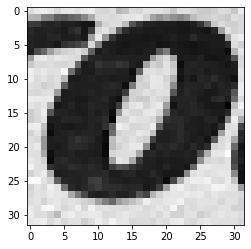

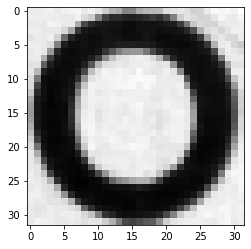

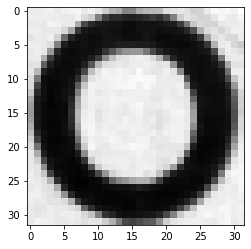

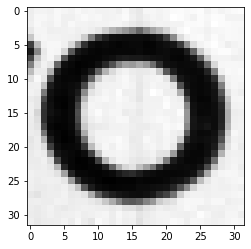

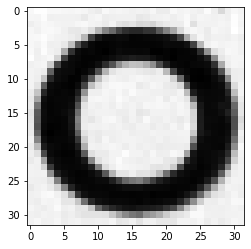

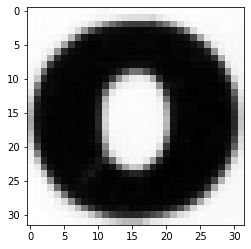

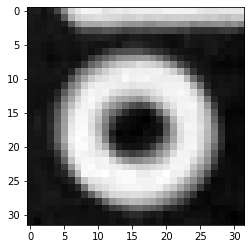

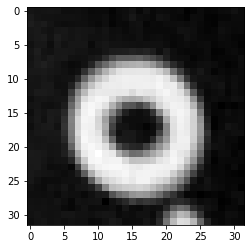

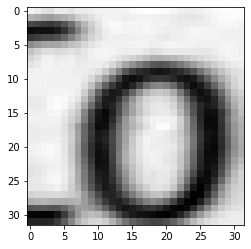

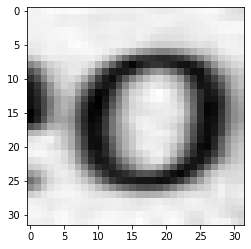

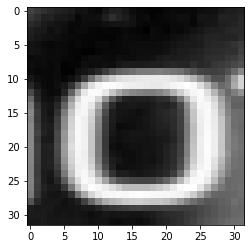

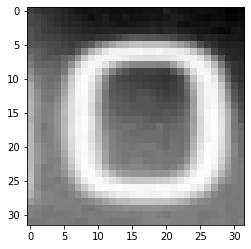

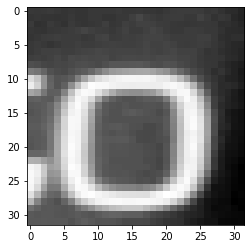

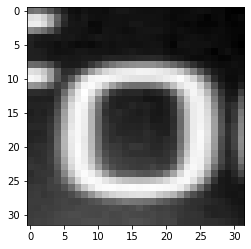

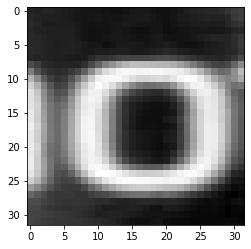

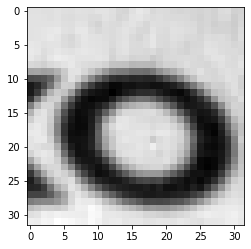

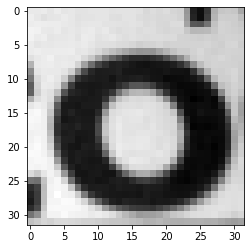

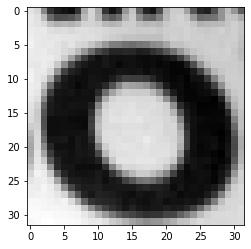

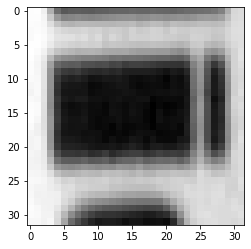

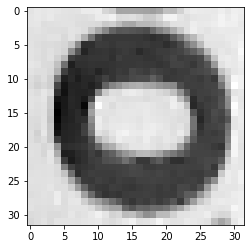

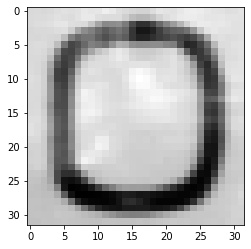

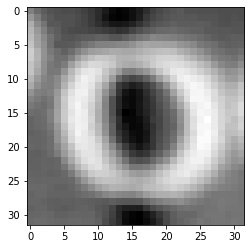

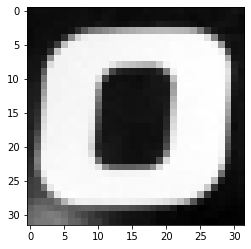

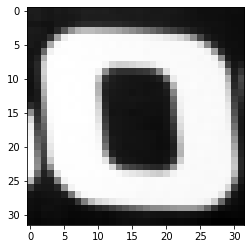

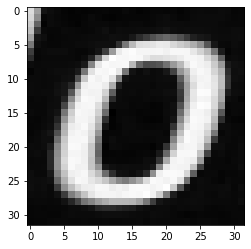

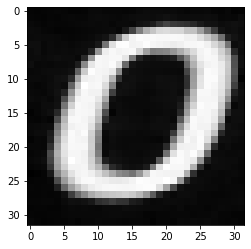

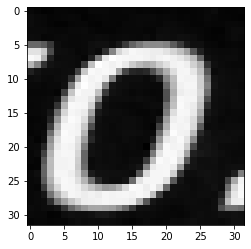

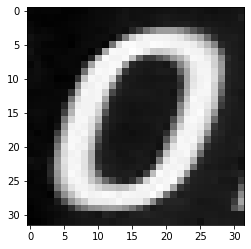

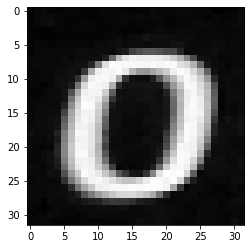

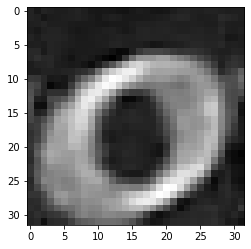

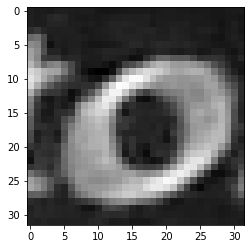

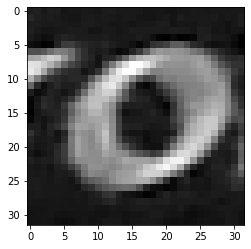

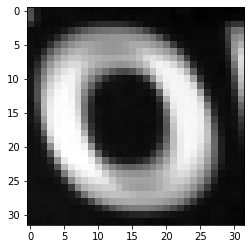

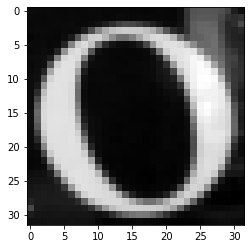

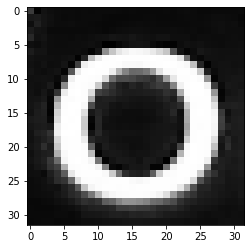

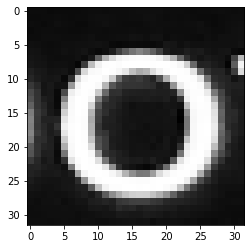

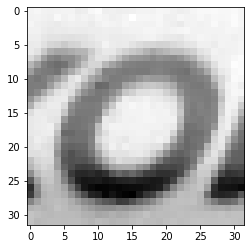

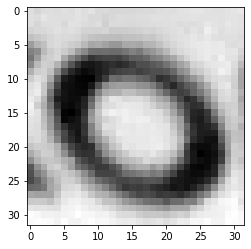

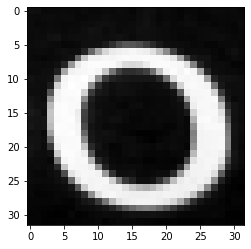

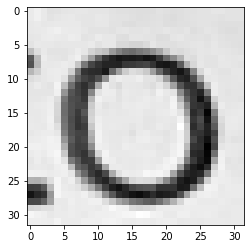

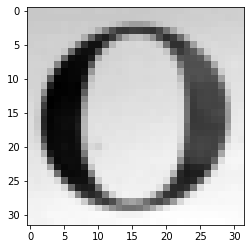

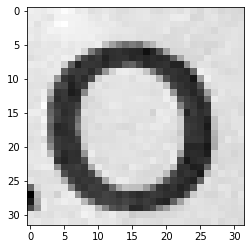

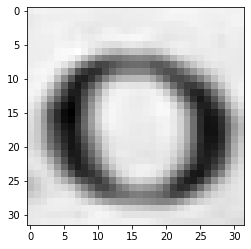

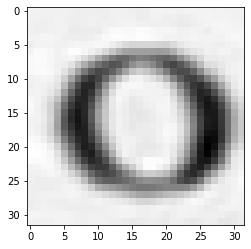

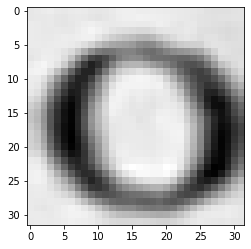

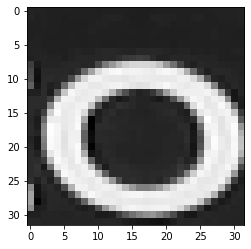

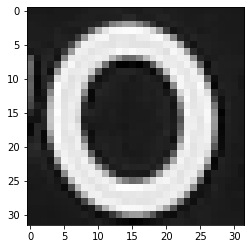

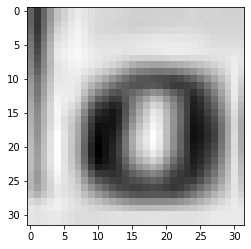

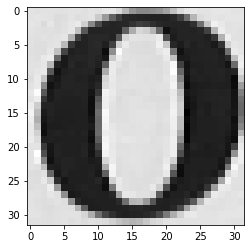

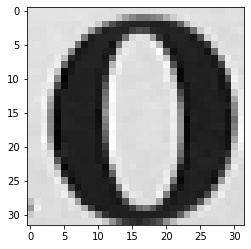

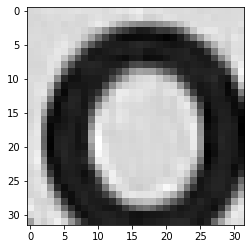

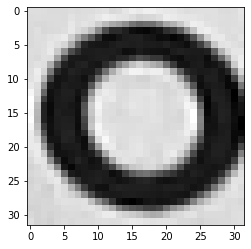

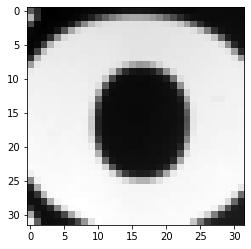

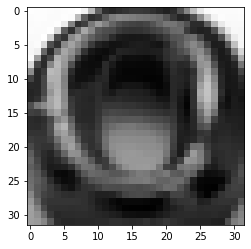

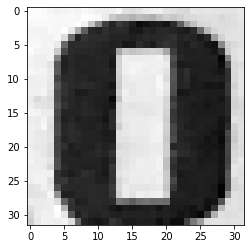

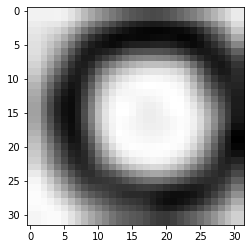

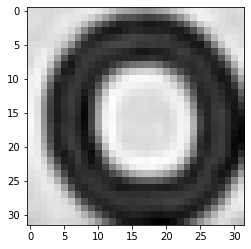

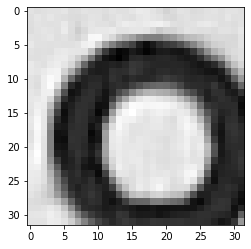

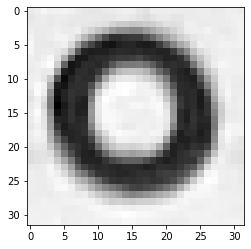

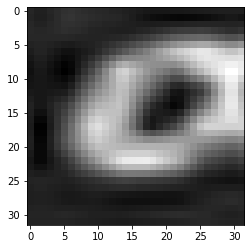

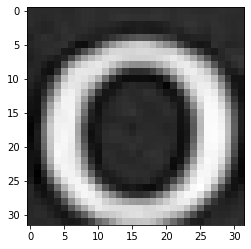

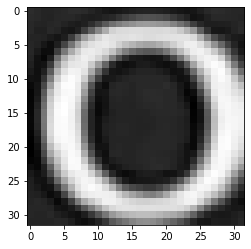

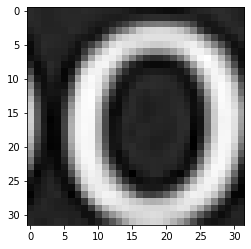

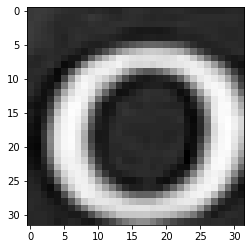

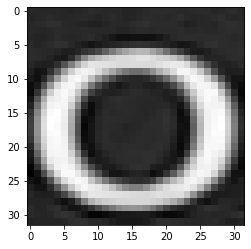

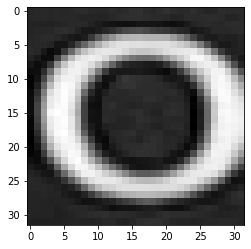

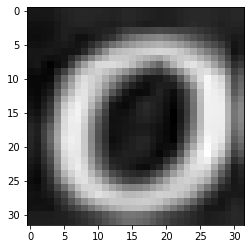

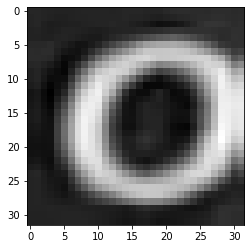

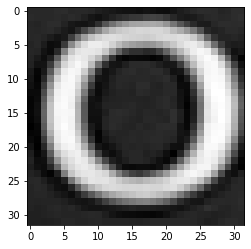

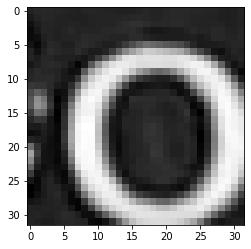

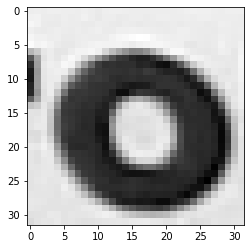

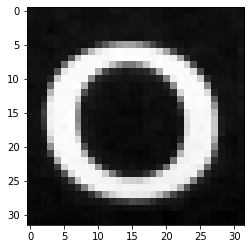

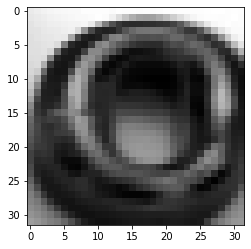

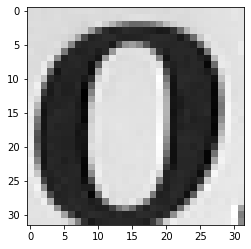

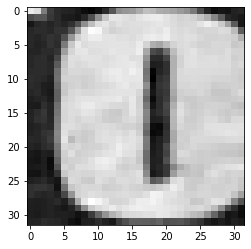

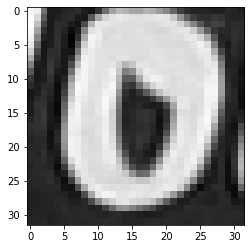

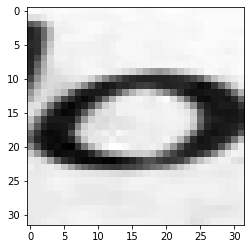

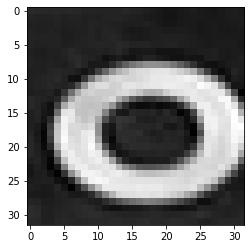

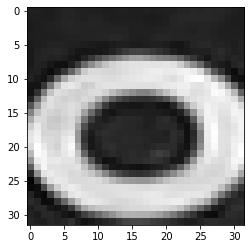

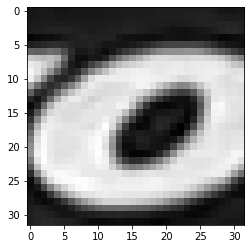

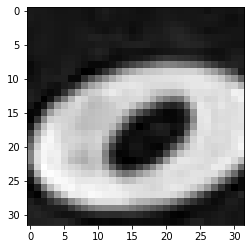

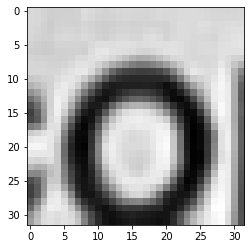

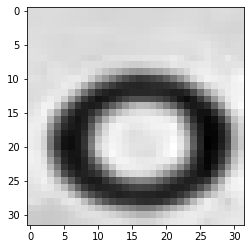

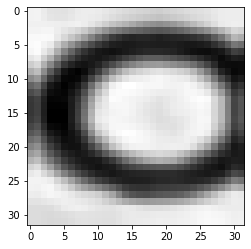

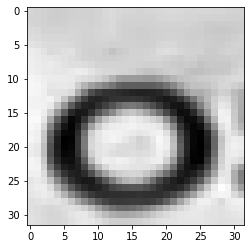

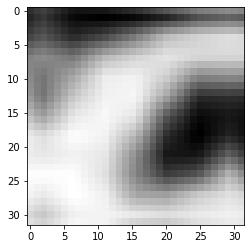

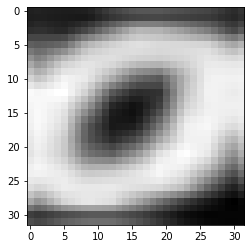

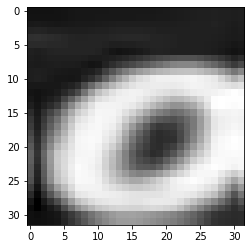

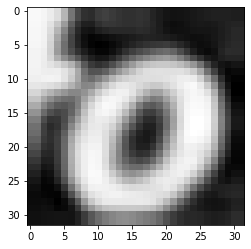

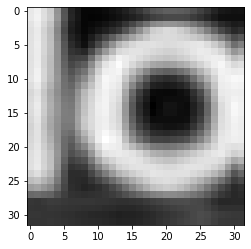

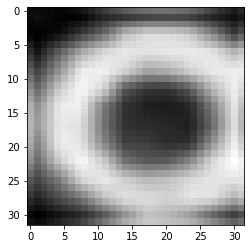

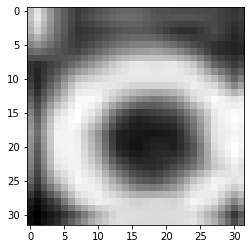

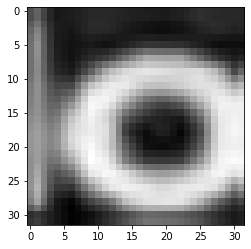

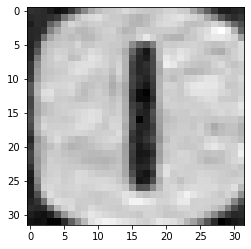

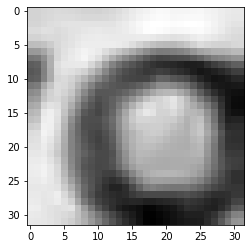

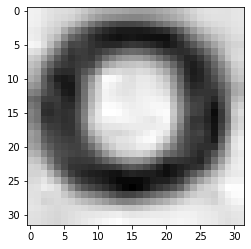

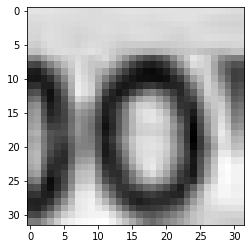

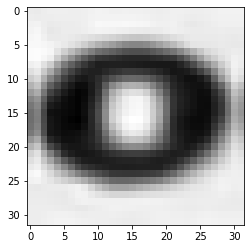

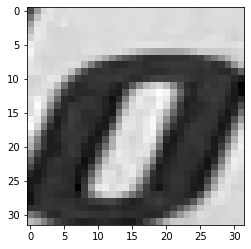

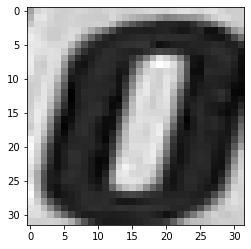

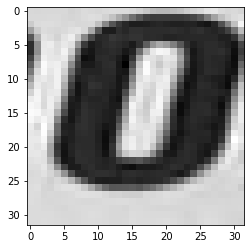

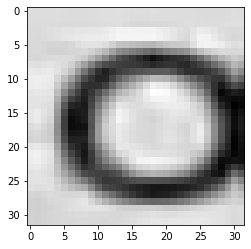

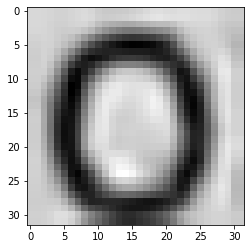

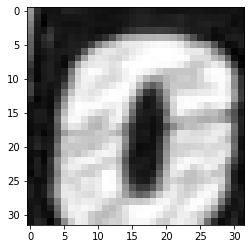

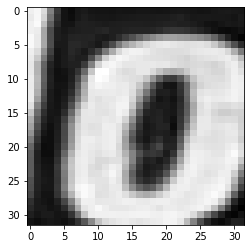

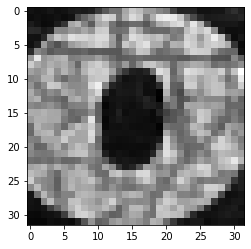

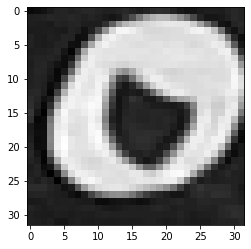

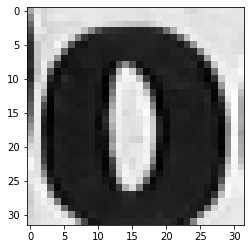

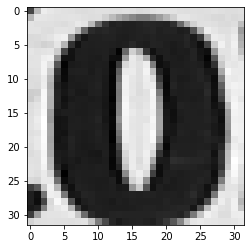

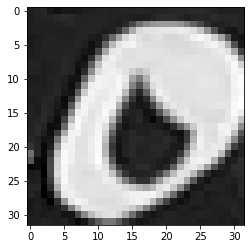

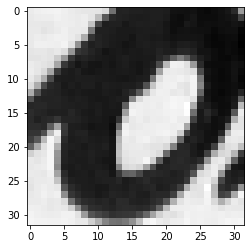

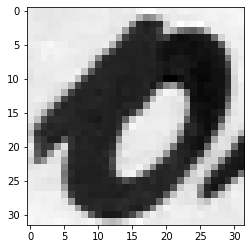

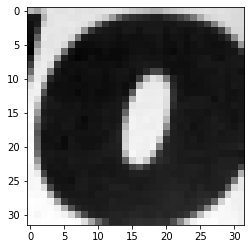

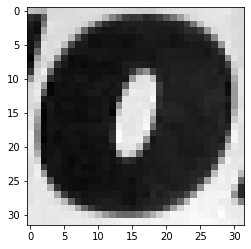

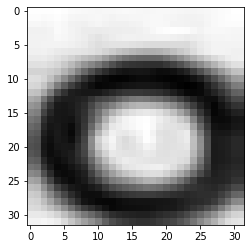

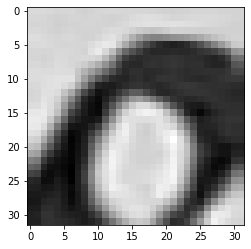

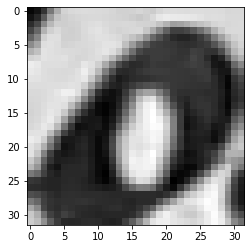

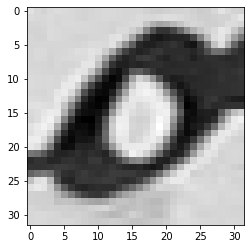

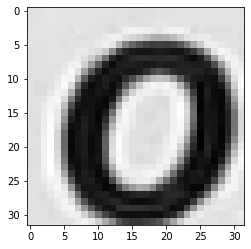

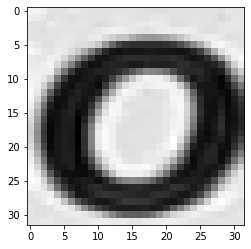

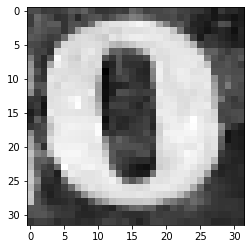

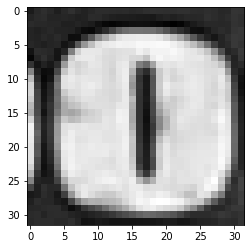

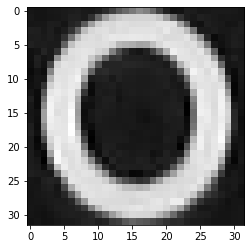

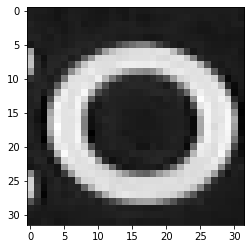

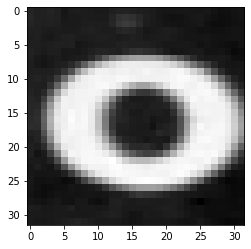

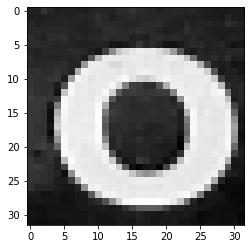

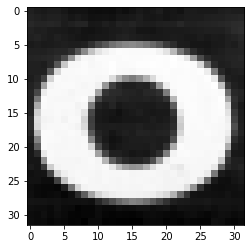

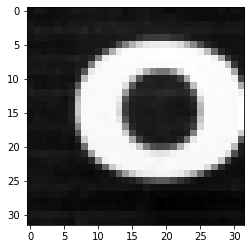

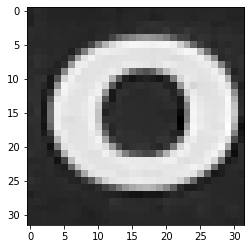

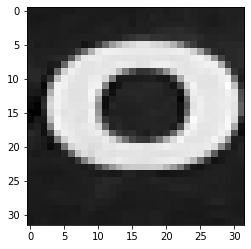

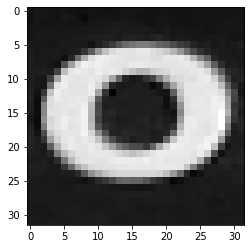

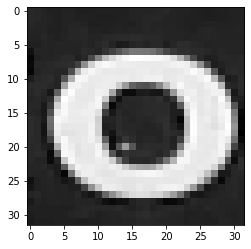

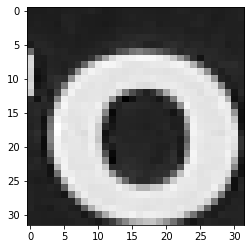

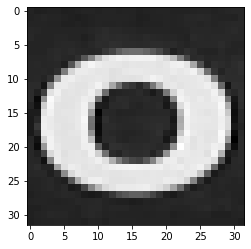

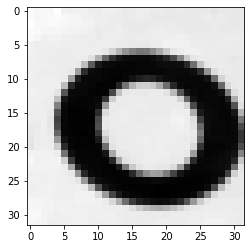

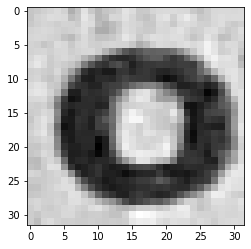

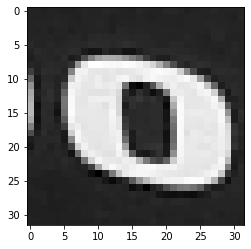

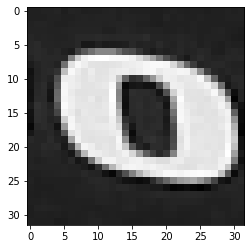

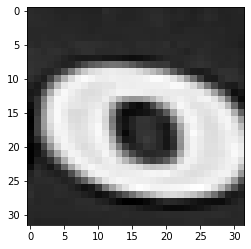

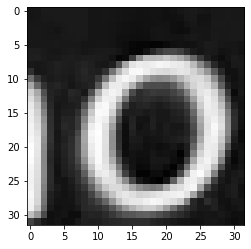

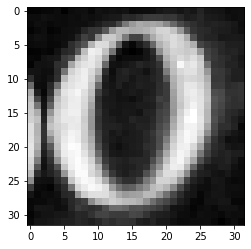

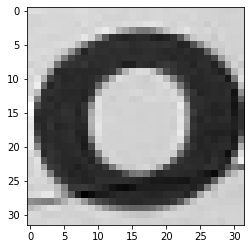

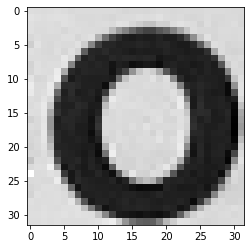

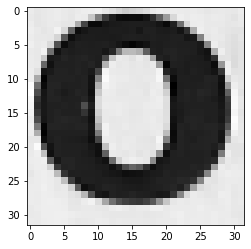

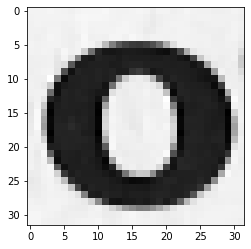

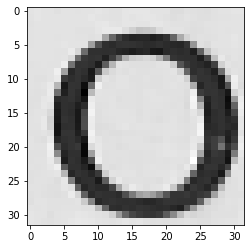

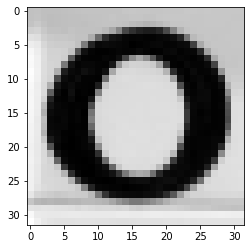

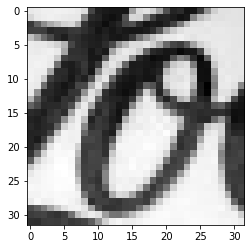

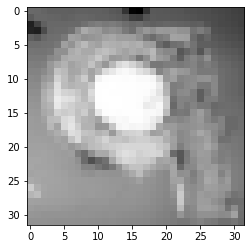

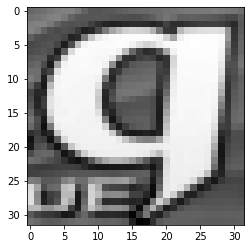

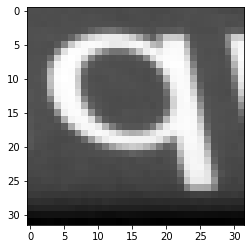

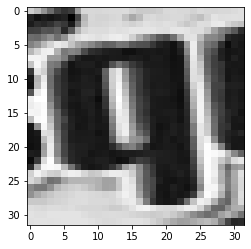

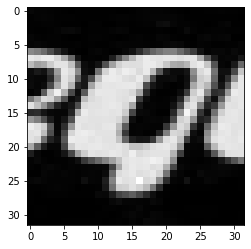

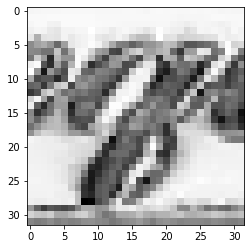

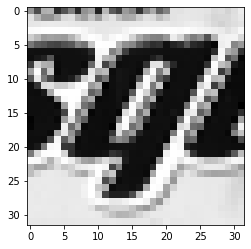

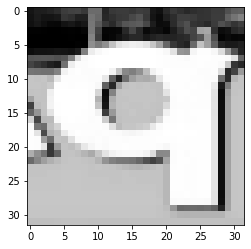

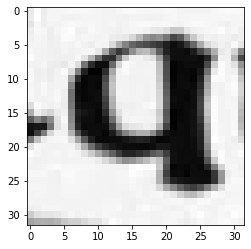

<ipython-input-174-eee4c632f99a>:14: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  gray = rgb2gray(images_list[i][j])


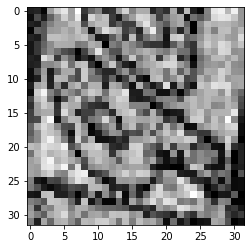

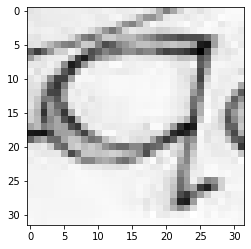

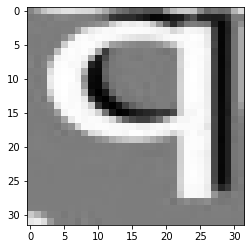

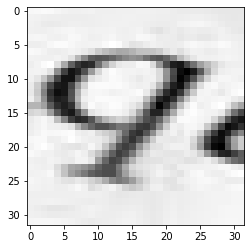

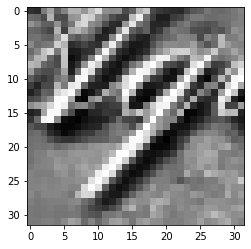

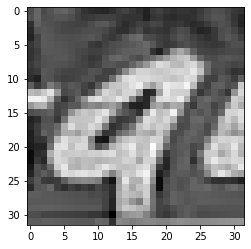

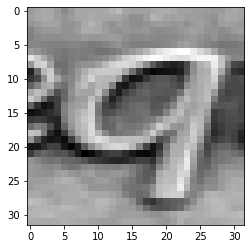

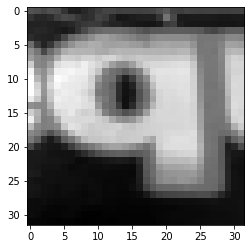

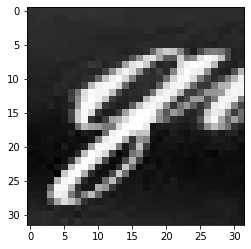

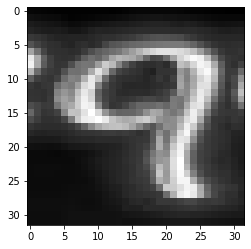

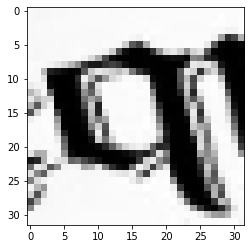

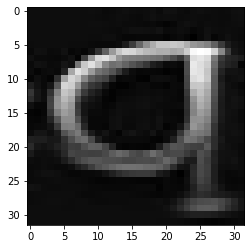

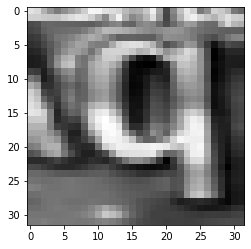

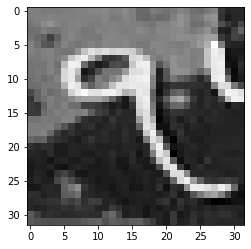

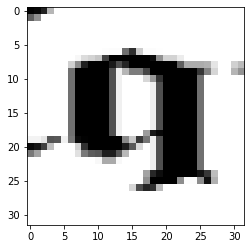

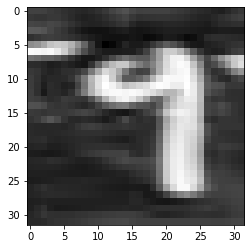

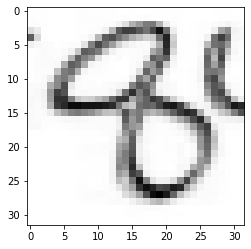

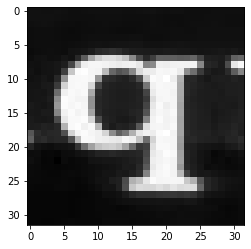

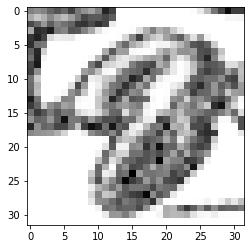

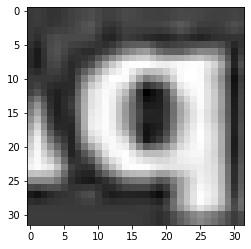

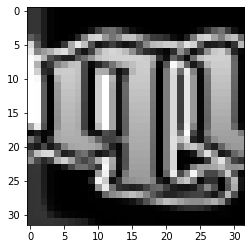

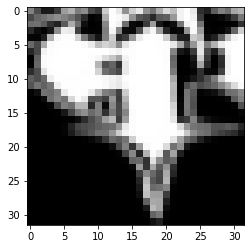

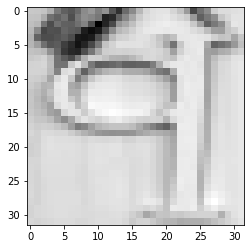

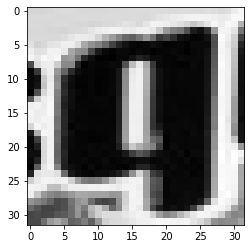

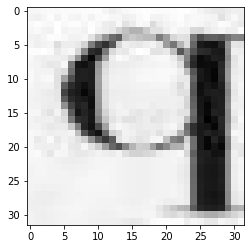

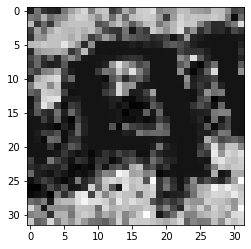

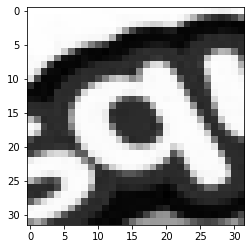

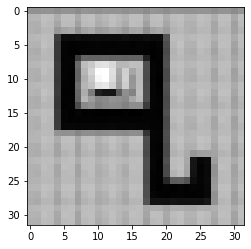

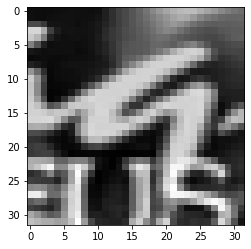

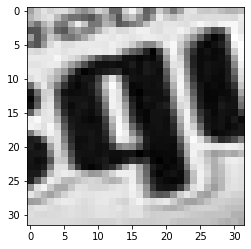

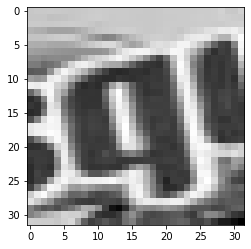

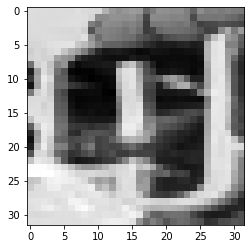

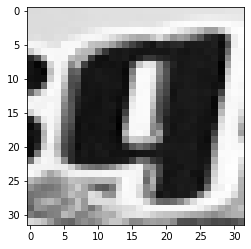

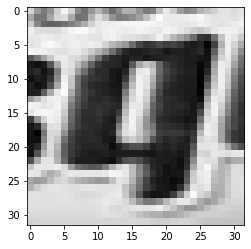

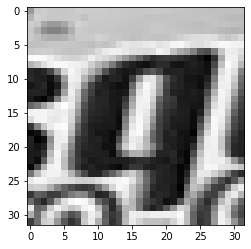

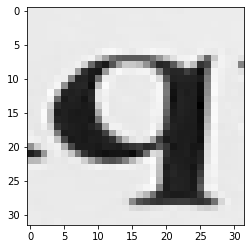

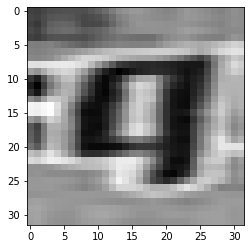

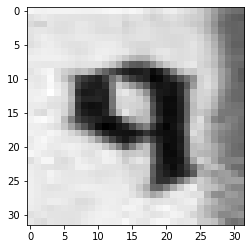

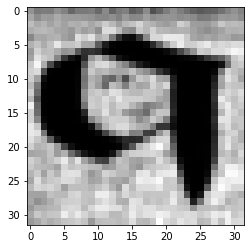

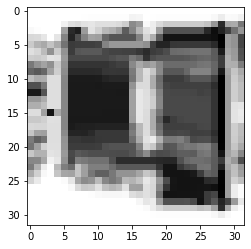

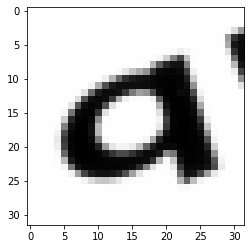

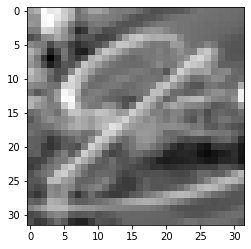

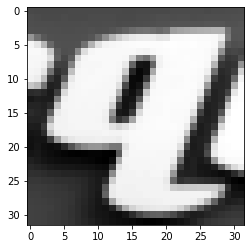

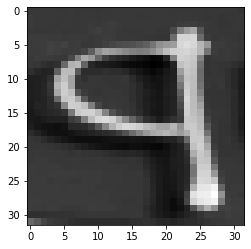

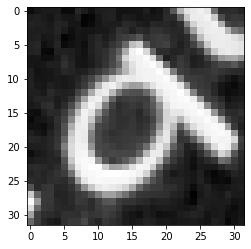

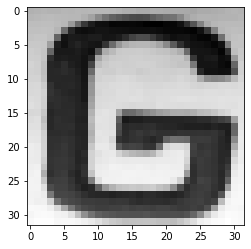

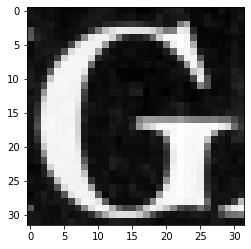

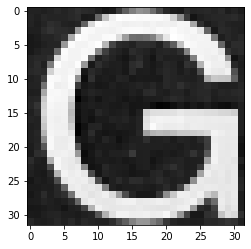

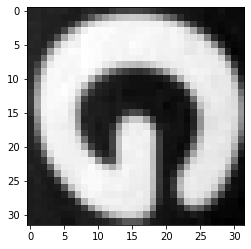

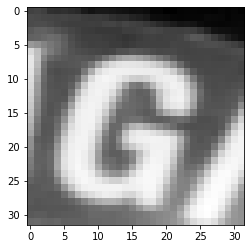

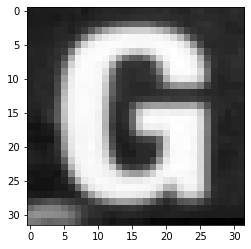

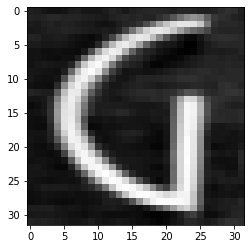

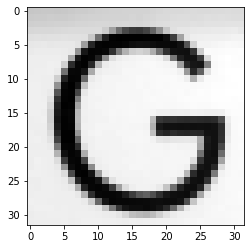

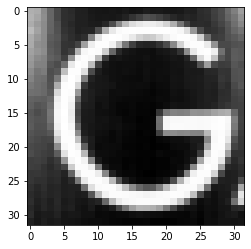

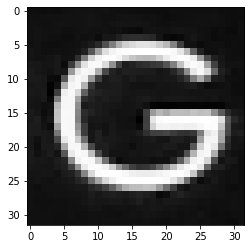

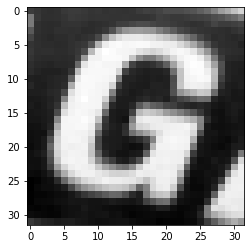

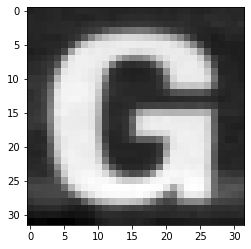

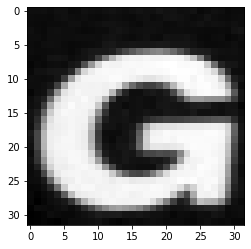

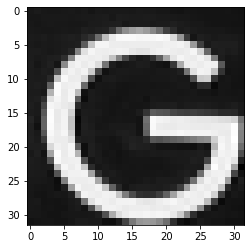

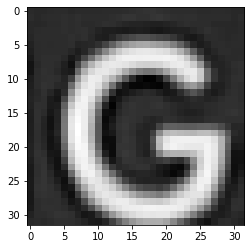

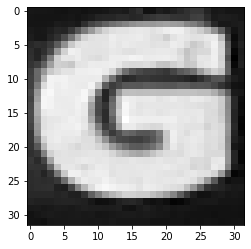

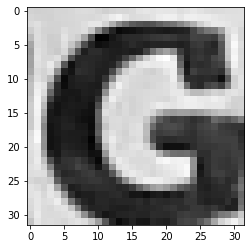

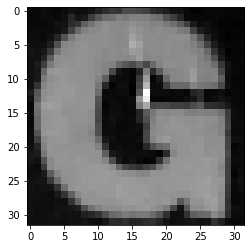

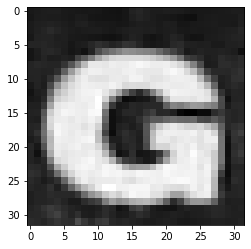

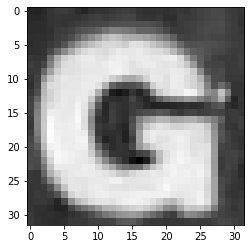

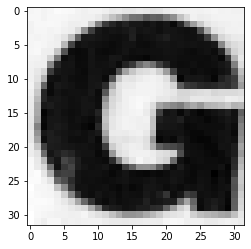

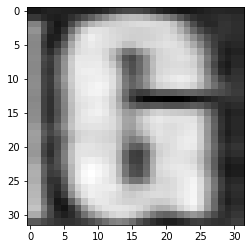

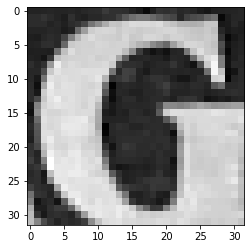

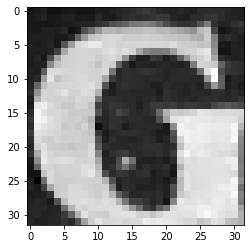

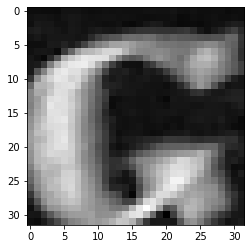

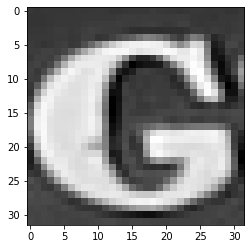

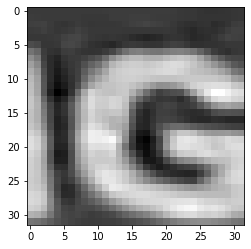

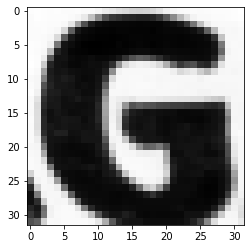

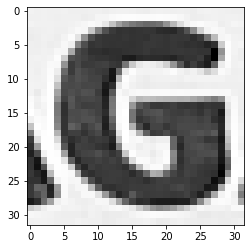

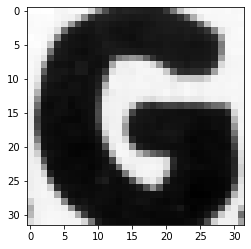

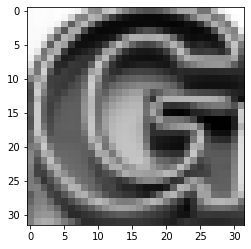

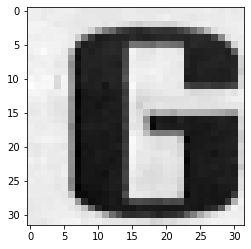

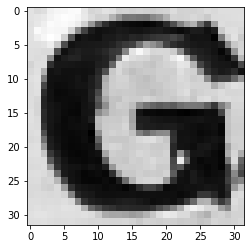

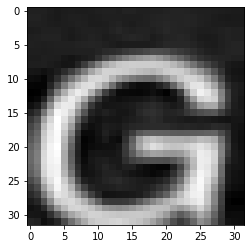

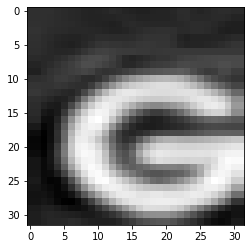

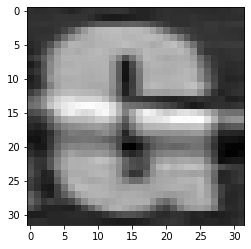

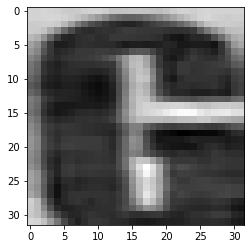

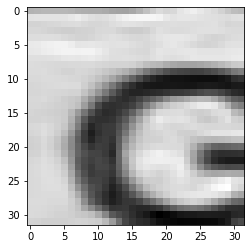

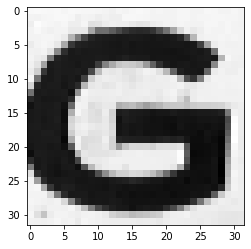

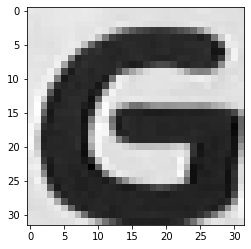

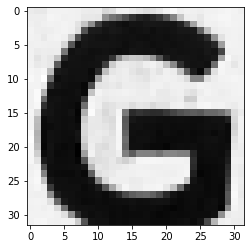

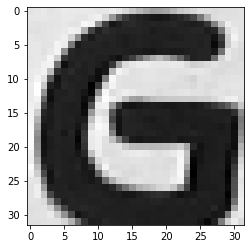

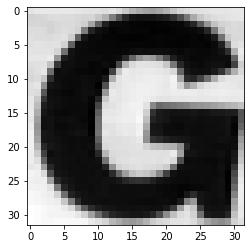

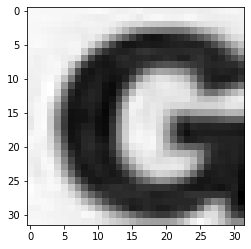

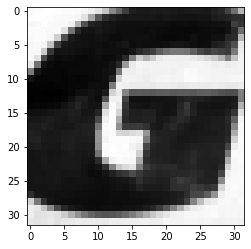

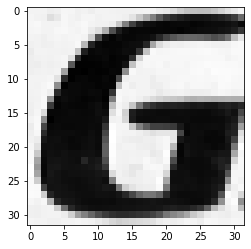

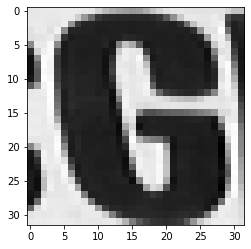

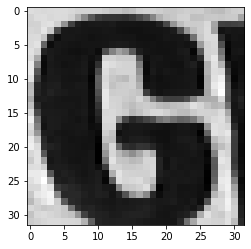

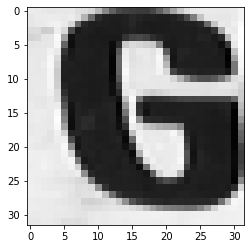

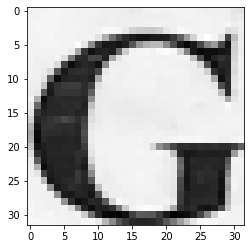

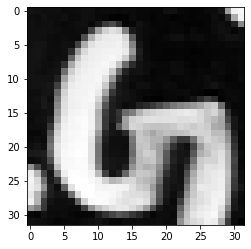

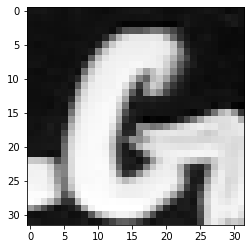

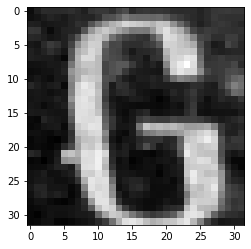

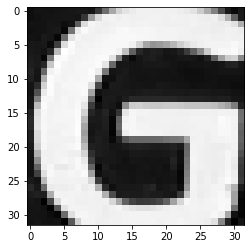

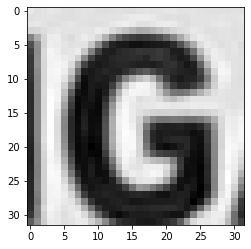

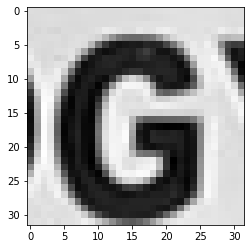

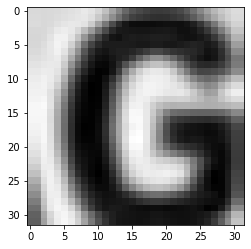

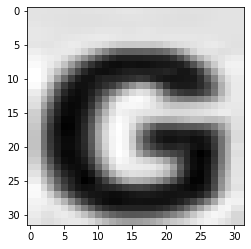

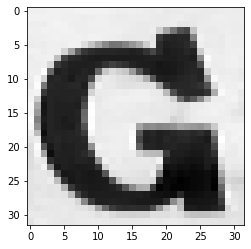

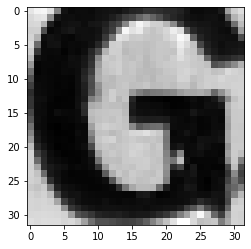

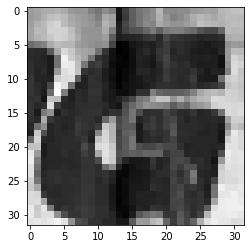

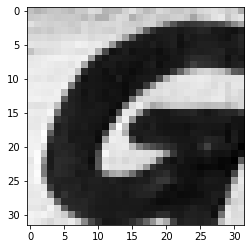

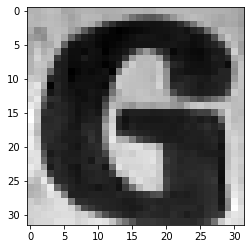

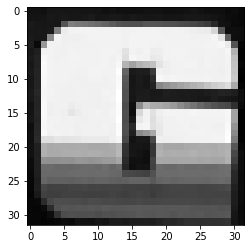

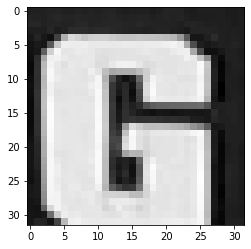

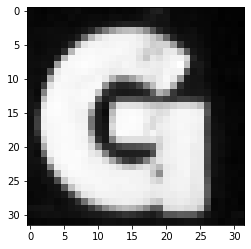

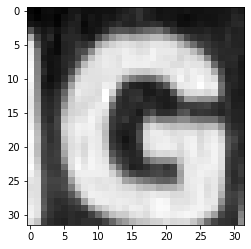

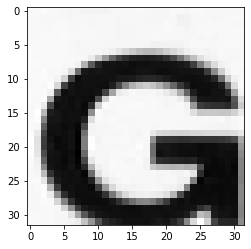

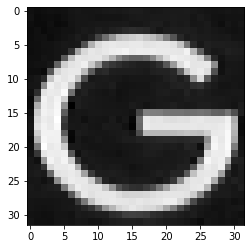

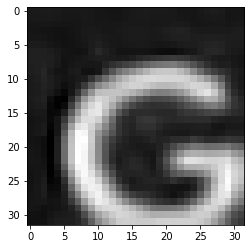

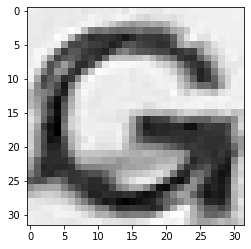

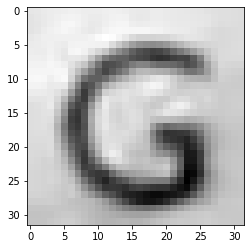

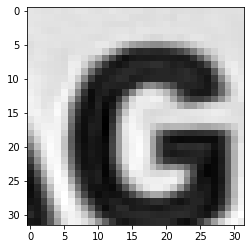

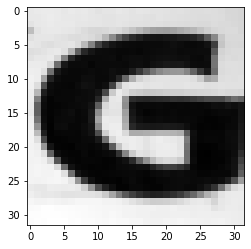

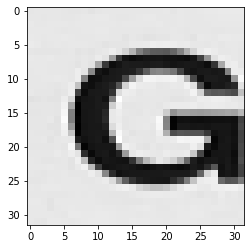

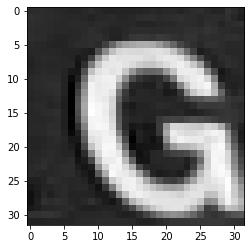

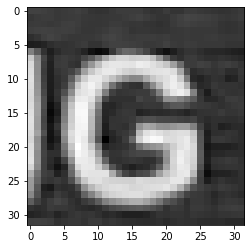

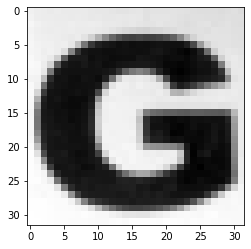

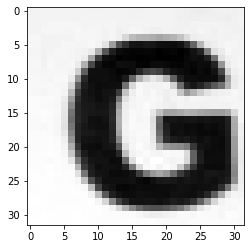

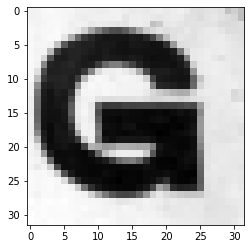

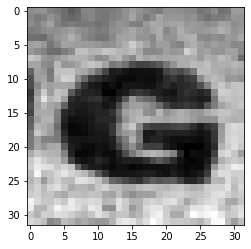

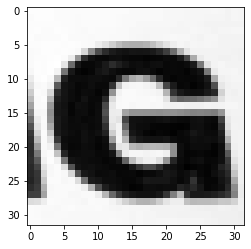

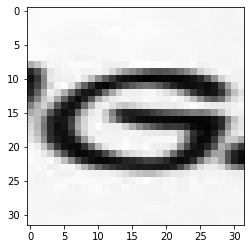

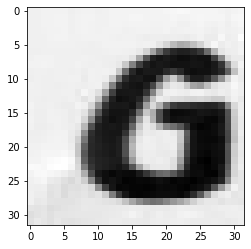

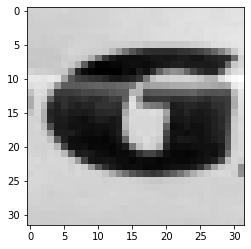

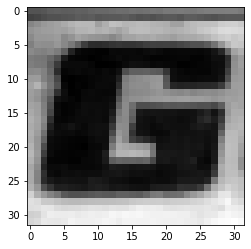

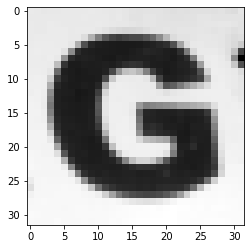

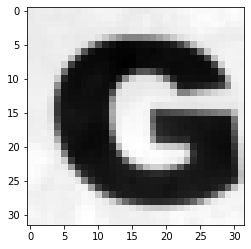

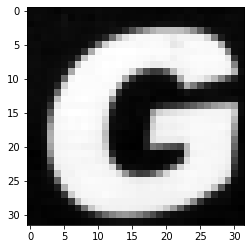

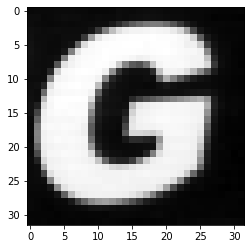

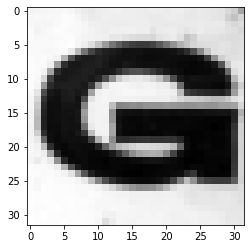

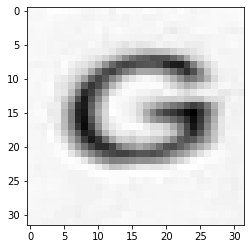

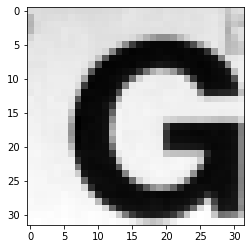

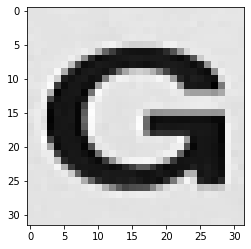

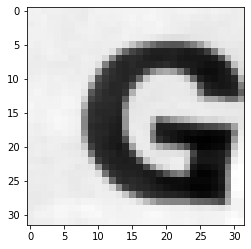

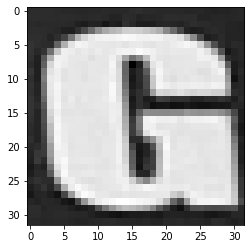

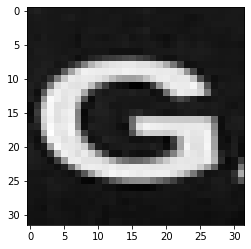

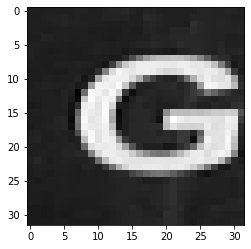

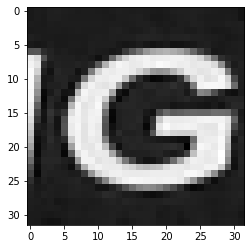

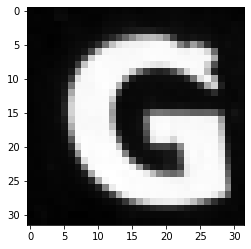

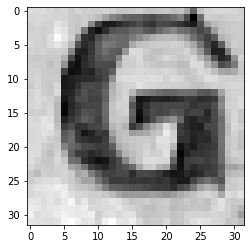

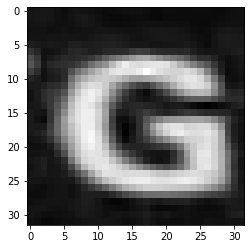

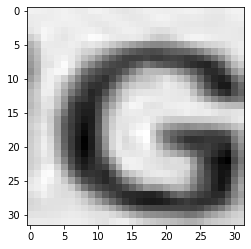

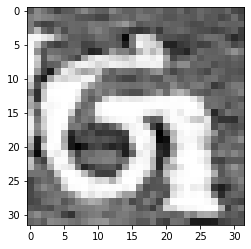

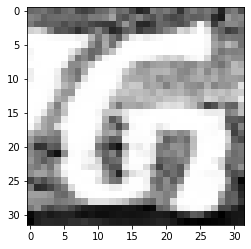

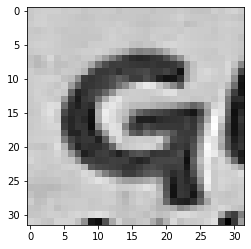

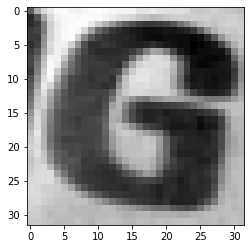

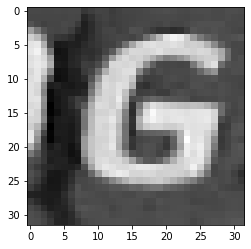

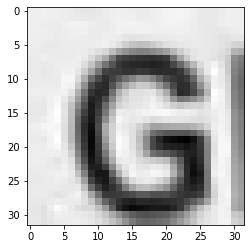

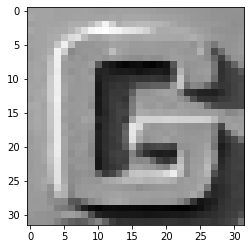

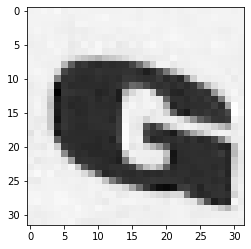

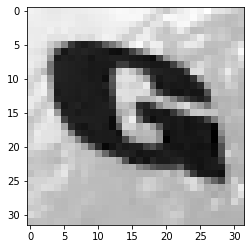

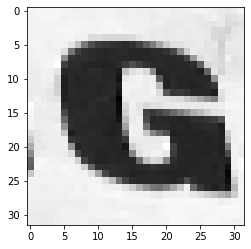

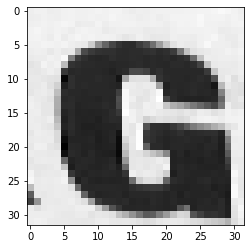

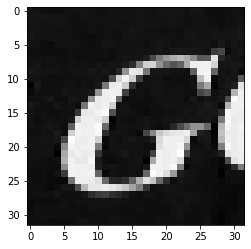

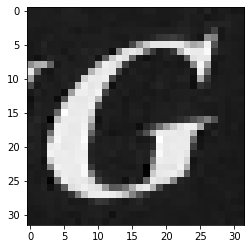

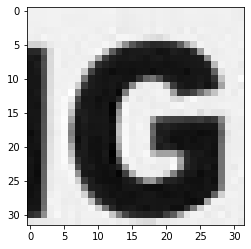

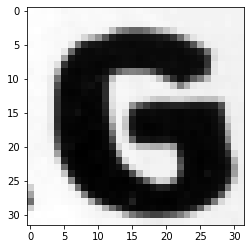

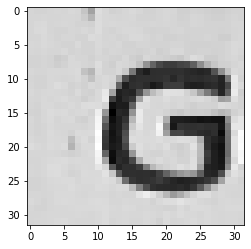

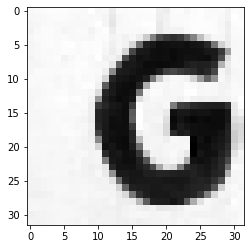

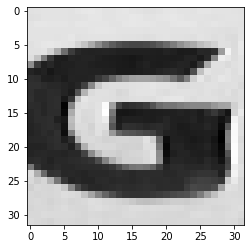

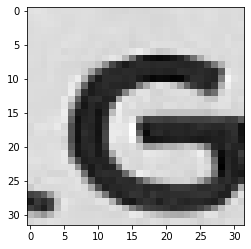

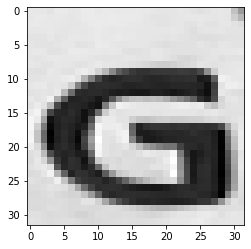

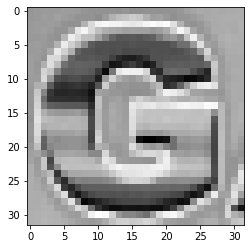

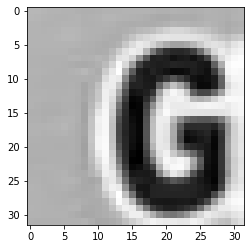

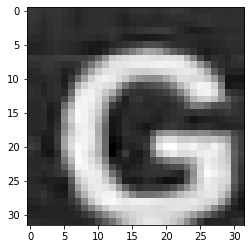

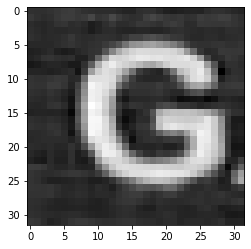

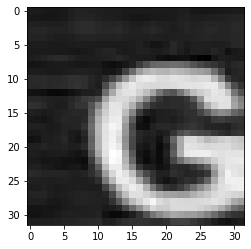

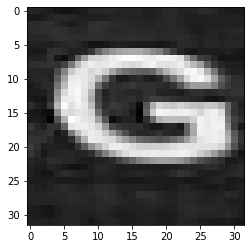

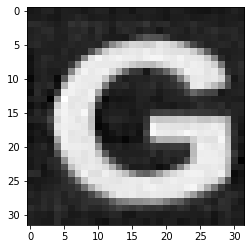

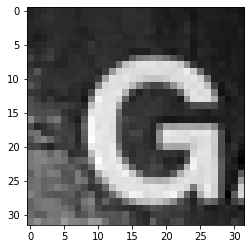

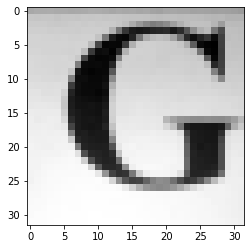

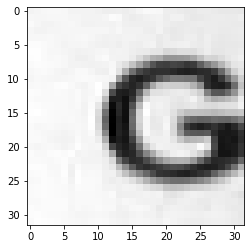

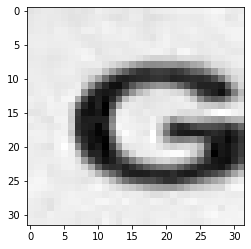

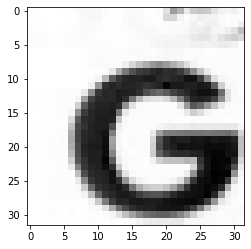

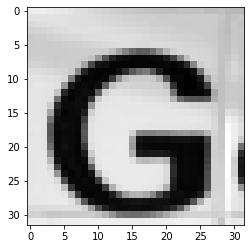

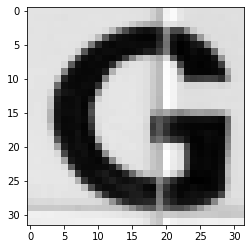

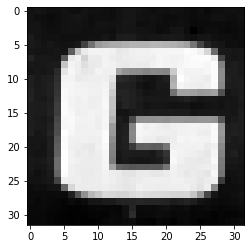

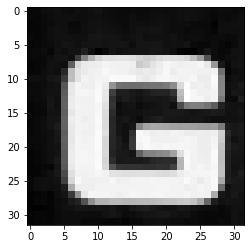

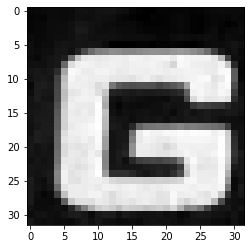

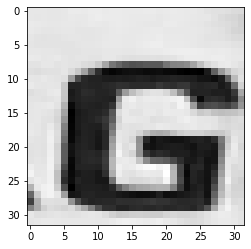

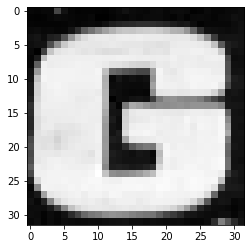

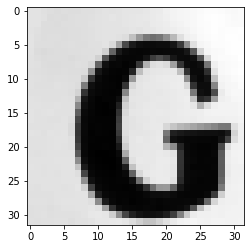

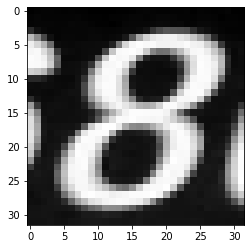

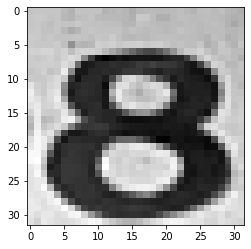

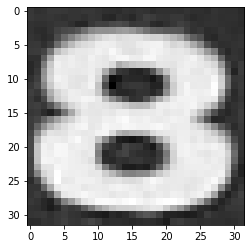

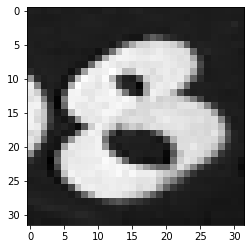

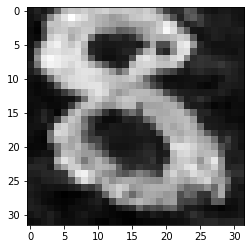

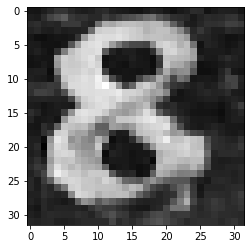

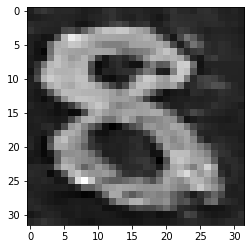

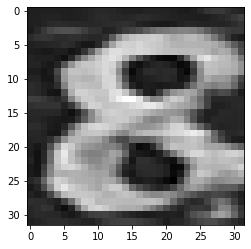

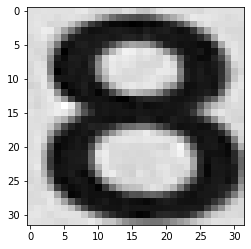

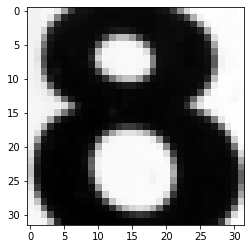

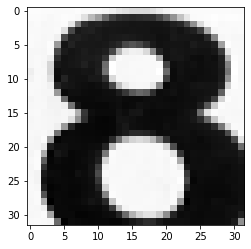

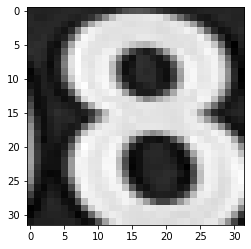

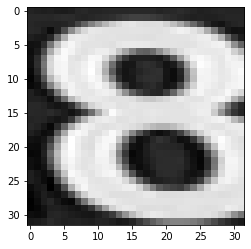

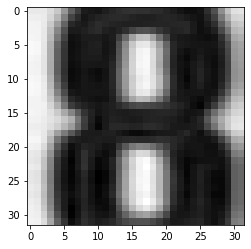

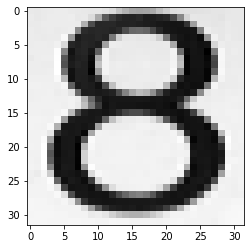

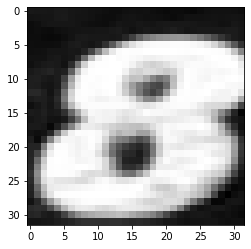

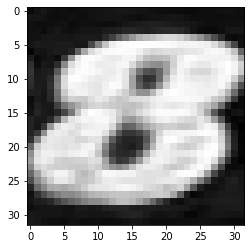

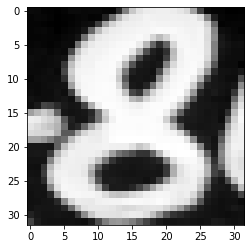

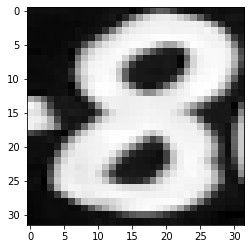

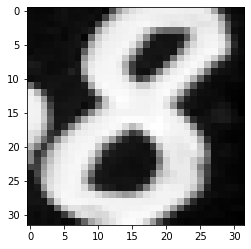

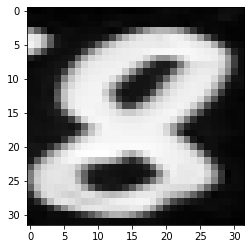

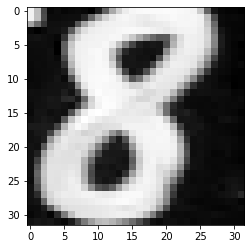

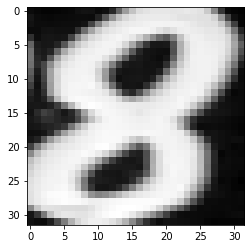

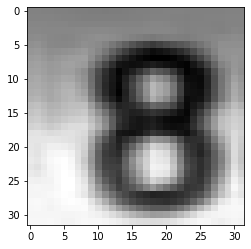

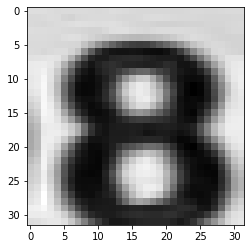

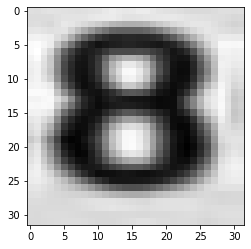

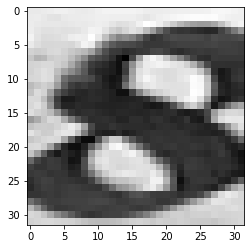

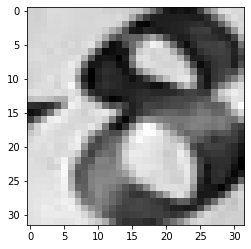

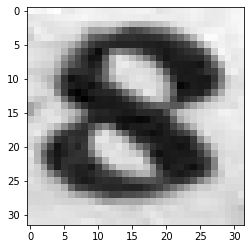

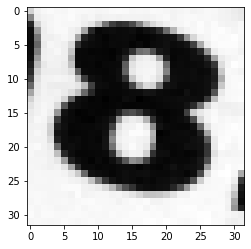

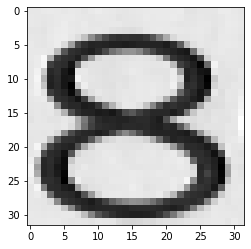

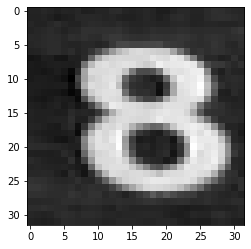

In [174]:
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

o_array_grayscale = []
q_array_grayscale = []
G_array_grayscale = []
n8_array_grayscale = []
images_list_grayscale = [o_array_grayscale, q_array_grayscale, G_array_grayscale, n8_array_grayscale]

for i in range (0,4):
    
    for j in range (0, len(images_list[i])):
        
        gray = rgb2gray(images_list[i][j])
        images_list_grayscale[i].append(gray)
        pyplot.imshow(images_list_grayscale[i][j], cmap=plt.cm.gray)
        pyplot.show()



In [175]:
images_list_grayscale

[[array([[0.65759216, 0.69052284, 0.69844225, ..., 0.65126132, 0.60998255,
          0.6897498 ],
         [0.57183319, 0.5644948 , 0.46220314, ..., 0.61369029, 0.66361853,
          0.65039461],
         [0.30103387, 0.29758926, 0.25856034, ..., 0.63104564, 0.62803706,
          0.6490924 ],
         ...,
         [0.68379569, 0.66258892, 0.7137099 , ..., 0.67246431, 0.63912725,
          0.63631088],
         [0.69420123, 0.66009848, 0.66561819, ..., 0.66833912, 0.67334142,
          0.66019559],
         [0.68057113, 0.69342225, 0.70013431, ..., 0.66820078, 0.66619779,
          0.64749397]]),
  array([[0.55315187, 0.55529518, 0.55720629, ..., 0.57995065, 0.57041712,
          0.59067367],
         [0.5634219 , 0.55672406, 0.560135  , ..., 0.55622827, 0.55241339,
          0.57109222],
         [0.55087895, 0.55166359, 0.54928322, ..., 0.55486426, 0.54974471,
          0.55850882],
         ...,
         [0.54958621, 0.54008587, 0.54270443, ..., 0.57327518, 0.55919557,
          0.5

In [176]:
for i in range (0,4):
  images_list_grayscale[i] = asarray(images_list_grayscale[i])  
  print(images_list_grayscale[i].shape)

(148, 32, 32)
(54, 32, 32)
(143, 32, 32)
(32, 32, 32)


In [178]:
# Now flatten the 32,32
images_list_grayscale_flattened = [[],[],[],[]]
for i in range (0,4):
    images_list_grayscale_flattened[i].append(images_list_grayscale[i].reshape(*images_list_grayscale[i].shape[:1], -1)) 

print((images_list_grayscale_flattened[3][0]).shape)
# print(images_list_grayscale_flattened)

(32, 1024)


In [179]:
for i in range (0,4):
  images_list_grayscale_flattened[i] = asarray(images_list_grayscale_flattened[i][0])  
  print(images_list_grayscale_flattened[i].shape)

(148, 1024)
(54, 1024)
(143, 1024)
(32, 1024)


In [188]:
X_unshuffled = np.concatenate([images_list_grayscale_flattened[0], images_list_grayscale_flattened[1], images_list_grayscale_flattened[2], images_list_grayscale_flattened[3]])

In [189]:
X_unshuffled.shape

(377, 1024)

In [193]:
y_unshuffled = np.zeros (X_unshuffled.shape[0])
print(y_unshuffled.shape)
y_unshuffled[0:148] = 0 # For "o" 110 pics
y_unshuffled[148:202] = 1 # For "q" 2 pics
y_unshuffled[202:345] = 2 # For G 77 pics
y_unshuffled[345:377] = 3 # For n8 10 pics

(unique, counts) = np.unique(y_unshuffled, return_counts=True)
print((unique, counts))

(377,)
(array([0., 1., 2., 3.]), array([148,  54, 143,  32]))


### . Binary Classifier o, q  (1st)
### . Binary Classifier G, n8 (2nd)

In [195]:
X_1st_unshuffled = X_unshuffled[:202]
y_1st_unshuffled = y_unshuffled[:202]
print (y_1st_unshuffled[201] )

X_2nd_unshuffled = X_unshuffled[202:]
y_2nd_unshuffled = y_unshuffled[202:]
y_2nd_unshuffled[0]

1.0


2.0

In [196]:
from sklearn.utils import shuffle

X_1st, y_1st= shuffle(X_1st_unshuffled, y_1st_unshuffled)
X_2nd, y_2nd= shuffle(X_2nd_unshuffled, y_2nd_unshuffled)

X_1st.shape, y_1st.shape, X_2nd.shape, y_2nd.shape

((202, 1024), (202,), (175, 1024), (175,))

In [197]:
from sklearn.model_selection import train_test_split
X_1st_train, X_1st_test, y_1st_train, y_1st_test = train_test_split(X_1st, y_1st, train_size=0.7, random_state=42 , shuffle=True)
X_1st_test, X_1st_val, y_1st_test, y_1st_val = train_test_split(X_1st_test, y_1st_test, train_size=0.5, random_state=42, shuffle=True)

# X_2nd_train, X_2nd_test, y_2nd_train, y_2nd_test = train_test_split(X_2nd, y_2nd, train_size=0.7, random_state=42 , stratify=y_2nd)
# X_2nd_test, X_2nd_val, y_2nd_test, y_2nd_val = train_test_split(X_2nd_test, y_2nd_test, train_size=0.5, random_state=42, stratify=y_2nd_test)

X_2nd_train, X_2nd_test, y_2nd_train, y_2nd_test = train_test_split(X_2nd, y_2nd, train_size=0.7, random_state=42 , shuffle=True)
X_2nd_test, X_2nd_val, y_2nd_test, y_2nd_val = train_test_split(X_2nd_test, y_2nd_test, train_size=0.5, random_state=42, shuffle=True)


In [212]:
type(X_1st_train)

numpy.ndarray

In [198]:
from sklearn.linear_model import LogisticRegression

bin_clf_1st = LogisticRegression(max_iter=10, tol=0.1, solver='liblinear')
bin_clf_1st.fit(X_1st_train, y_1st_train)
print( bin_clf_1st.score(X_1st_train, y_1st_train) , bin_clf_1st.score(X_1st_val, y_1st_val) , bin_clf_1st.score(X_1st_test, y_1st_test) )

bin_clf_2nd = LogisticRegression(max_iter=10, tol=0.1, solver='liblinear')
bin_clf_2nd.fit(X_2nd_train, y_2nd_train)
bin_clf_2nd.score(X_2nd_train, y_2nd_train) , bin_clf_2nd.score(X_2nd_val, y_2nd_val) , bin_clf_2nd.score(X_2nd_test, y_2nd_test)

0.9787234042553191 0.9032258064516129 0.7666666666666667


(0.9098360655737705, 0.8518518518518519, 0.8461538461538461)

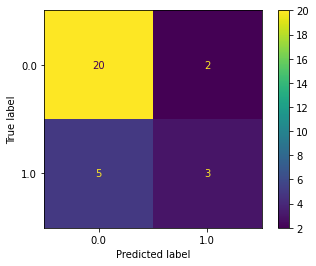

In [199]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bin_clf_1st, X_1st_test, y_1st_test)  
plt.show()

In [224]:
from sklearn.metrics import confusion_matrix

y_1st_pred = bin_clf_1st.predict(X_1st_test)
tn, fp, fn, tp = confusion_matrix(y_1st_test, y_1st_pred).ravel()

In [226]:
TP, TN, FP, FN = tp, tn, fp, fn 
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Recall = TP / (TP + FN)
Percision =  TP / (TP + FP)

Accuracy, Recall, Percision

(0.7666666666666667, 0.375, 0.6)

In [203]:
TP, TN, FP, FN = 3, 20, 2, 5
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Recall = TP / (TP + FN)
Percision =  TP / (TP + FP)

Accuracy, Recall, Percision

(0.7666666666666667, 0.375, 0.6)

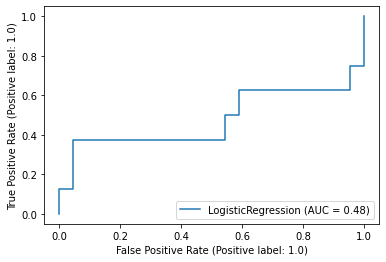

In [204]:
from sklearn import metrics
metrics.plot_roc_curve(bin_clf_1st, X_1st_test, y_1st_test) 
plt.show()

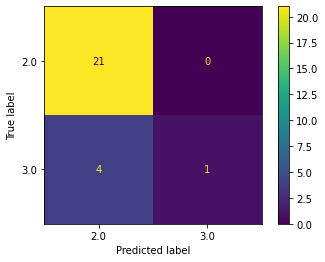

In [200]:
plot_confusion_matrix(bin_clf_2nd, X_2nd_test, y_2nd_test)  
plt.show()

In [230]:
y_2nd_pred = bin_clf_2nd.predict(X_2nd_test)
tn, fp, fn, tp = confusion_matrix(y_2nd_test, y_2nd_pred).ravel()

In [231]:
TP, TN, FP, FN = tp, tn, fp, fn
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Recall = TP / (TP + FN)
Percision =  TP / (TP + FP)

Accuracy, Recall, Percision

(0.8461538461538461, 0.2, 1.0)

In [205]:
TP, TN, FP, FN = 1, 21, 0, 4
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Recall = TP / (TP + FN)
Percision =  TP / (TP + FP)

Accuracy, Recall, Percision

(0.8461538461538461, 0.2, 1.0)

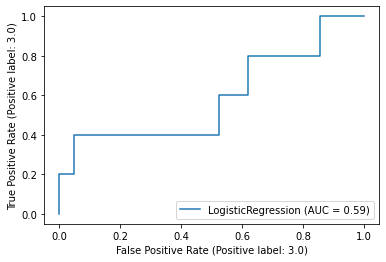

In [206]:
metrics.plot_roc_curve(bin_clf_2nd, X_2nd_test, y_2nd_test) 
plt.show()

In [266]:
# from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(X_2nd_test, y_2nd_pred)

### Multi Class Classifier

In [213]:
from sklearn.utils import shuffle

X, y= shuffle(X_unshuffled, y_unshuffled)
X.shape, y.shape

((377, 1024), (377,))

In [214]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42 , stratify=y)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=42, stratify=y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42 , shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=42, shuffle=True)


In [215]:
# from sklearn.linear_model import SGDClassifier

# We could stop by setting the maximum iteration if this takes too long
# sgd_clf = SGDClassifier(max_iter=10, random_state=42)
# sgd_clf = SGDClassifier(random_state=42)
# sgd_clf.fit(X_train, y_train)
# sgd_clf.score(X_train, y_train), sgd_clf.score(X_val, y_val) , sgd_clf.score(X_test, y_test)

from sklearn.linear_model import LogisticRegression

bin_clf_multi = LogisticRegression(max_iter=10, tol=0.1, solver='liblinear')
bin_clf_multi.fit(X_train, y_train)
print( bin_clf_multi.score(X_train, y_train) , bin_clf_multi.score(X_val, y_val) , bin_clf_multi.score(X_test, y_test) )


0.8250950570342205 0.42105263157894735 0.45614035087719296


In [267]:
accuracy_score(X_test, y_test)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

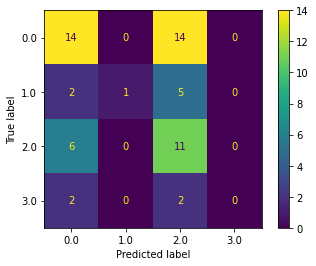

In [216]:
plot_confusion_matrix(bin_clf_multi, X_test, y_test)  
plt.show()

In [240]:
y_pred = bin_clf_multi.predict(X_test)
t0p0, t0p1, t0p2, t0p3, t1p0, t1p1, t1p2, t1p3, t2p0, t2p1, t2p2, t2p3, t3p0, t3p1, t3p2, t3p3 = confusion_matrix(y_test, y_pred).ravel()
t0p0, t0p1, t0p2, t0p3, t1p0, t1p1, t1p2, t1p3, t2p0, t2p1, t2p2, t2p3, t3p0, t3p1, t3p2, t3p3

(14, 0, 14, 0, 2, 1, 5, 0, 6, 0, 11, 0, 2, 0, 2, 0)

https://arxiv.org/pdf/2008.05756.pdf#:~:text=Accuracy%20is%20one%20of%20the,computed%20from%20the%20confusion%20matrix.&text=The%20formula%20of%20the%20Accuracy,confusion%20matrix%20at%20the%20denominator.


In [258]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, digits=4 , zero_division = False))

              precision    recall  f1-score   support

         0.0     0.5833    0.5000    0.5385        28
         1.0     1.0000    0.1250    0.2222         8
         2.0     0.3438    0.6471    0.4490        17
         3.0     0.0000    0.0000    0.0000         4

    accuracy                         0.4561        57
   macro avg     0.4818    0.3180    0.3024        57
weighted avg     0.5294    0.4561    0.4296        57



In [243]:
# metrics for "o" (Class 0)

Accuracy = (t0p0 + t1p1+t1p2+t1p3+t2p1+t2p2+t2p3+t3p1+t3p2+t3p3) / (t0p0+t0p1+t0p2+t0p3+t1p0+t1p1+t1p2+t1p3+t2p0+t2p1+t2p2+t2p3+t3p0+t3p1+t3p2+t3p3)
Recall = t0p0 / (t0p0 + t0p1 + t0p2 + t0p3)
Percision =  t0p0 / (t0p0 + t1p0+ t2p0 + t3p0)

Accuracy, Recall, Percision

(0.5789473684210527, 0.5, 0.5833333333333334)

In [219]:
# metrics for "o" (Class 0)
TP, TN, FP, FN = 14, 19, 10, 14
Accuracy = (TP + TN) / (T
                       )
Recall = TP / (TP + FN)
Percision =  TP / (TP + FP)

Accuracy, Recall, Percision

(0.5789473684210527, 0.5, 0.5833333333333334)

In [244]:
# metrics for "q" (Classs 1)
Accuracy = (t1p1 + t0p1+t0p2+t0p3+t2p1+t2p2+t2p3+t3p1+t3p2+t3p3) / (t1p1+t1p1+t1p2+t1p3+t0p1+t0p1+t0p2+t0p3+t2p1+t2p1+t2p2+t2p3+t3p1+t3p1+t3p2+t3p3)
Recall = t1p1 / (t1p1 + t1p0 + t1p2 + t1p3)
Percision =  t1p1 / (t1p1 + t0p1+ t2p1 + t3p1)

Accuracy, Recall, Percision

(0.8235294117647058, 0.125, 1.0)

In [257]:
# metrics for "G" (Class 2)
Accuracy = (t2p2 + t1p1+t1p0+t1p3+t0p1+t0p0+t0p3+t3p1+t3p0+t3p3) / (t2p2+t2p1+t2p0+t2p3+t1p2+t1p1+t1p0+t1p3+t0p2+t0p1+t0p0+t0p3+t3p2+t3p1+t3p0+t3p3)
Recall = t2p2 / (t2p2 + t2p1 + t2p0 + t2p3)
Percision =  t2p2 / (t2p2 + t1p2+ t0p2 + t3p2)

Accuracy, Recall, Percision

(0.5263157894736842, 0.6470588235294118, 0.34375)

In [262]:
# metrics for 8 (Class 3 )

Accuracy = (t3p3 + t1p1+t1p2+t1p0+t2p1+t2p2+t2p0+t0p1+t0p2+t0p0) / (t3p3+t3p1+t3p2+t3p0+t1p3+t1p1+t1p2+t1p0+t2p3+t2p1+t2p2+t2p0+t0p3+t0p1+t0p2+t0p0)
Recall = t3p3 / (t3p3 + t3p1 + t3p2 + t3p0)
Percision =  t3p3 / (t3p3 + t1p3+ t2p3 + t0p3)

Accuracy, Recall, Percision, (t3p3 ,t1p3,t2p3 ,t0p3)

<ipython-input-262-8c899543d384>:5: RuntimeWarning: invalid value encountered in long_scalars
  Percision =  t3p3 / (t3p3 + t1p3+ t2p3 + t0p3)


(0.9298245614035088, 0.0, nan, (0, 0, 0, 0))

In [ ]:
Accuracy = (t0p0 + t1p1 + t2p2 + t3p3) / ()